In [ ]:
import numpy as np
import tables as tb
import pandas as pd
import scipy.stats as sct
import glob
import os
import sys 

import matplotlib.pyplot as plt

import invisible_cities.io.dst_io as dio

from scipy.optimize import curve_fit

#path of the current file, added to pythonpath to use the functions
dir_path = os.path.dirname(os.getcwd())
sys.path.append(dir_path)

from utils_hist import get_all_files, get_files_contents, create_hist_df_simple, create_tracks_hist, get_hist_from_data, get_group_nodes_names
from city_hist.tracks_hist import get_tracks, get_feat_tracks
from city_hist.chits_hist import get_chits_ener
from plot_hist_utils import plot_hist_comparison, get_chi2_stats


In [13]:
hyp_A_path = '/Users/mperez/NEXT/ic_dev/prueba/old_prod/hist_hyp.h5'
hyp_B_path = '/Users/mperez/NEXT/ic_dev/prueba/refactor_prod/hist_hyp.h5'

hyp_comp_path = '/Users/mperez/NEXT/ic_dev/prueba/hyp_comp.h5'

In [26]:
results = get_chi2_stats(hyp_A_path, hyp_B_path, 'hypathia')
results_ = get_chi2_stats(hyp_comp_path, hyp_comp_path, 'hypathia', tag = ('old', 'ref'))

In [30]:
# group_names, node_names = get_group_nodes_names(hyp_A_path)
# for n in node_names[0]:
#     if n.split('_')[-1] == 'cut':
#         continue
#     #plot_hist_comparison(pen_100_path, sop_100_path, 'penthesilea', 'sophronia', n)
#     plot_hist_comparison(hyp_comp_path, hyp_comp_path, 'hypathiaold', 'hypathiaref', n, scale = 'linear', legend1='Old', legend2='Ref')
#     #plt.savefig('show_plots/penthesilea/penth_comp_' + n + '.png')
#     plt.show()

## Comparacion penthesilea-sophronia (100 ficheros - 13205 eventos)

In [23]:
pen_100_path = '/Users/mperez/NEXT/ic_dev/files/old_prod/hist_pen_n100.h5'
sop_100_path = '/Users/mperez/NEXT/ic_dev/files/refactor_prod/hist_sop_n100.h5'
pen_comp_100_path = '/Users/mperez/NEXT/ic_dev/files/pen_comp_n100.h5'

In [54]:
results = get_chi2_stats(pen_100_path, sop_100_path, 'penthesilea')

In [55]:
results_ = get_chi2_stats(pen_comp_100_path, pen_comp_100_path, 'penthesilea')

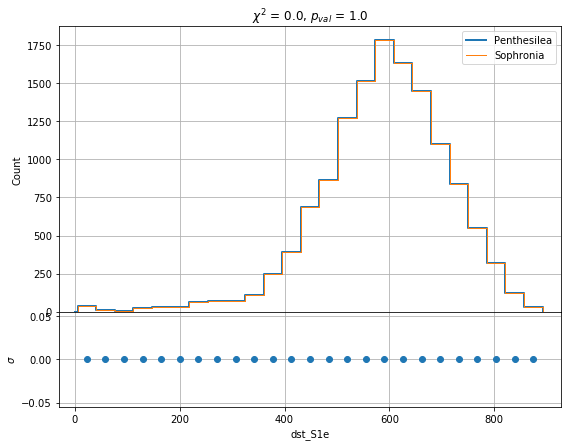

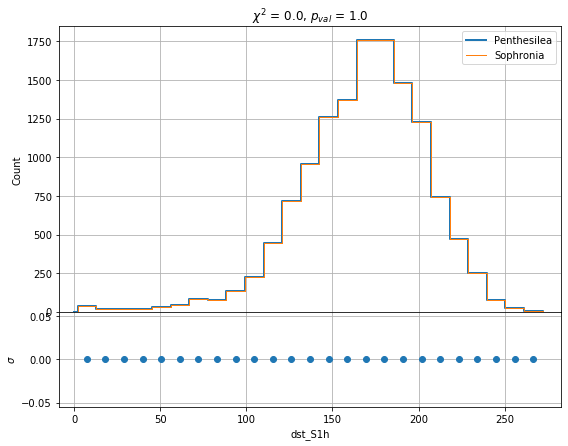

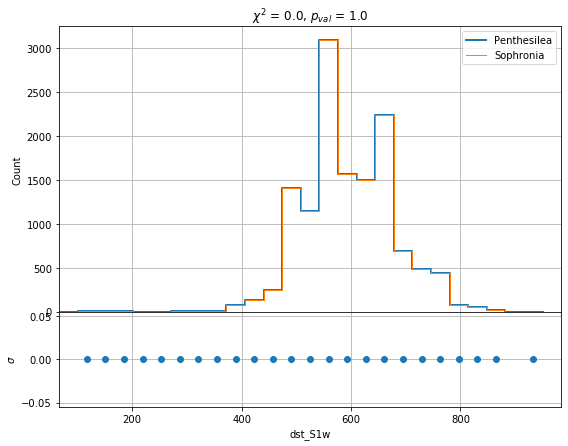

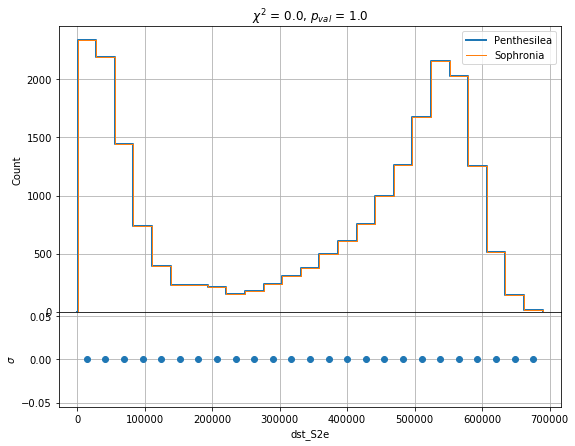

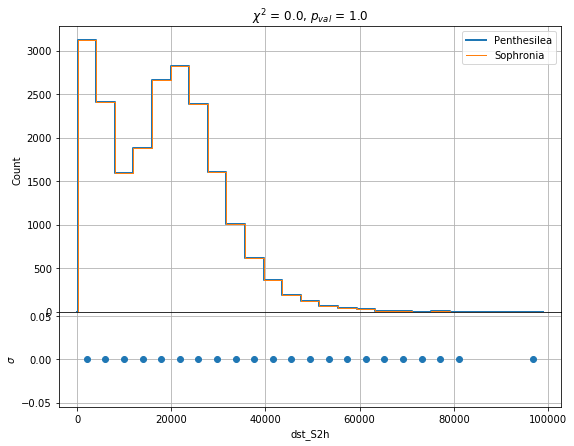

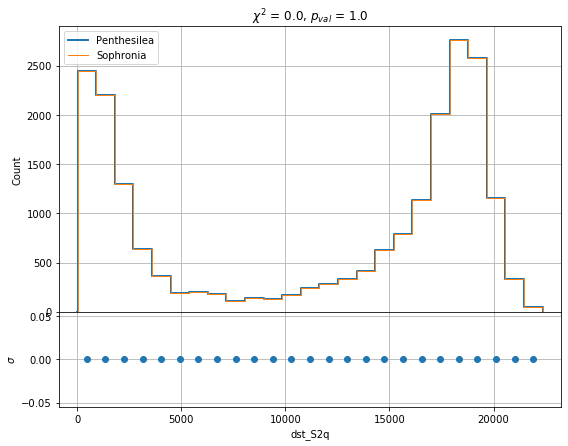

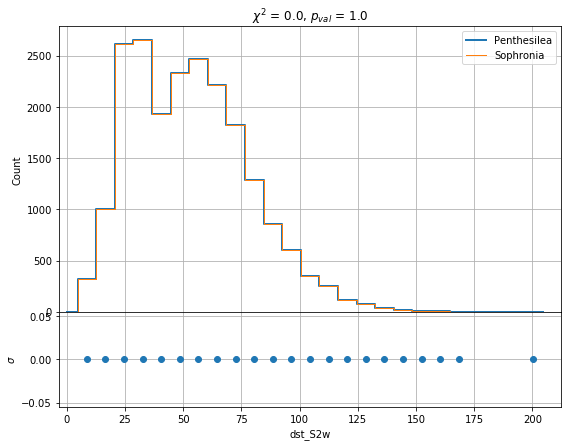

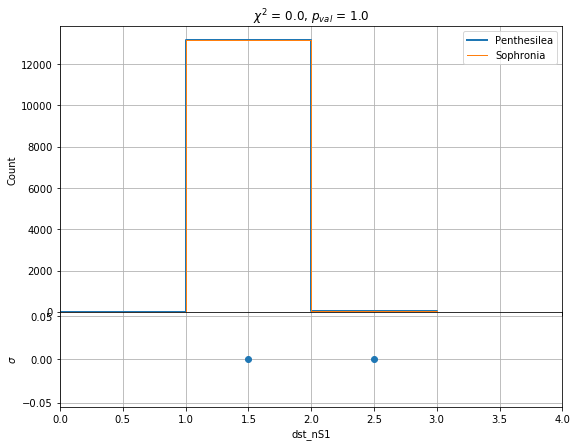

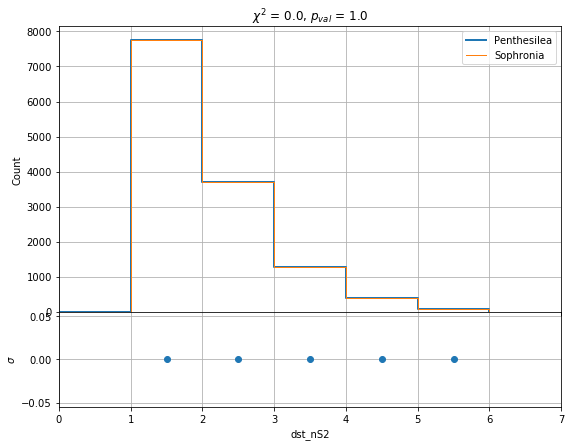

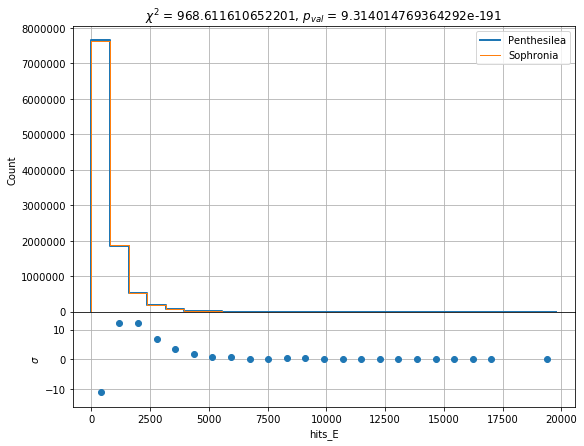

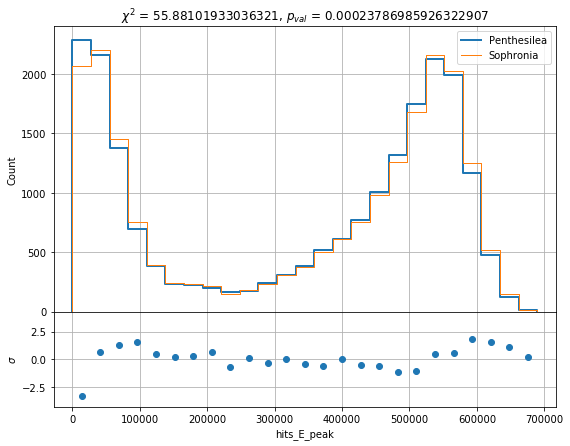

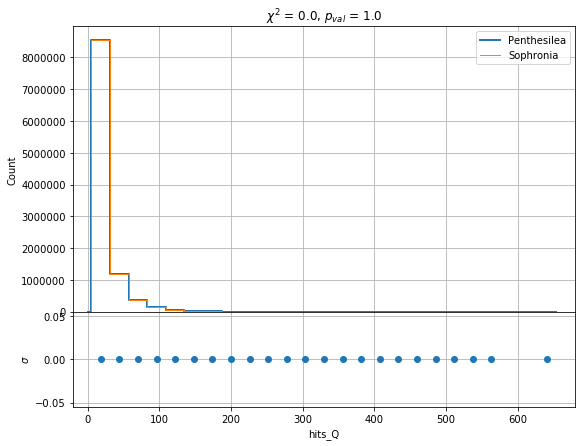

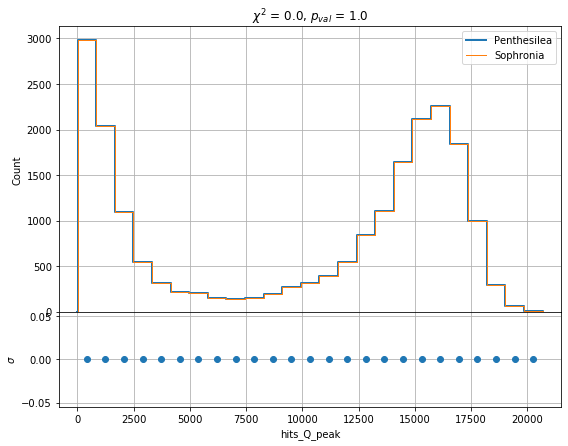

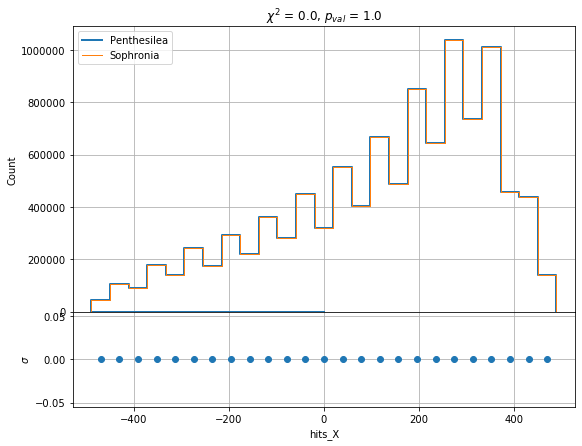

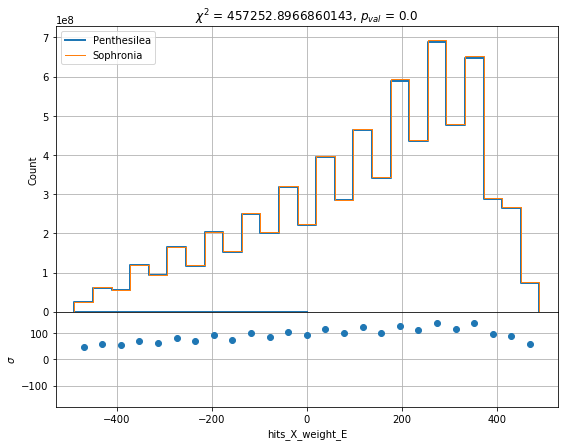

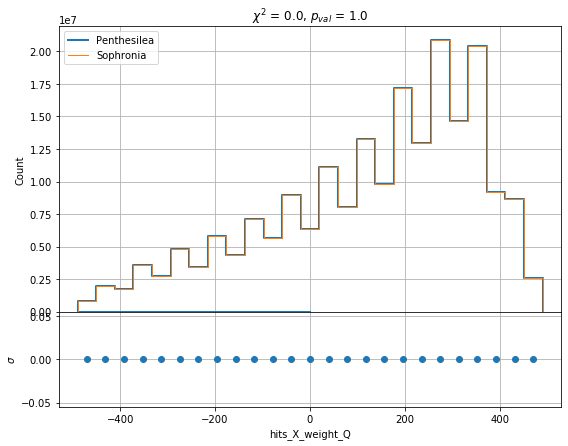

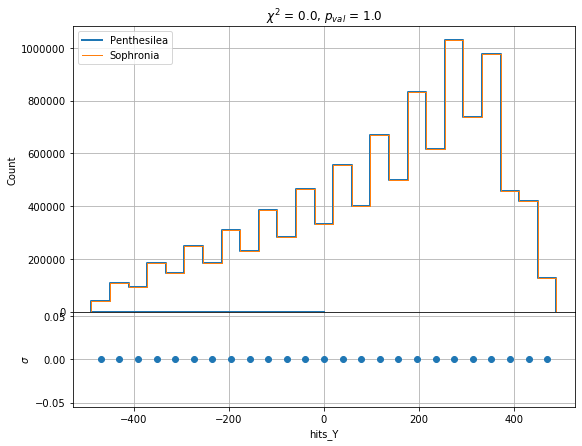

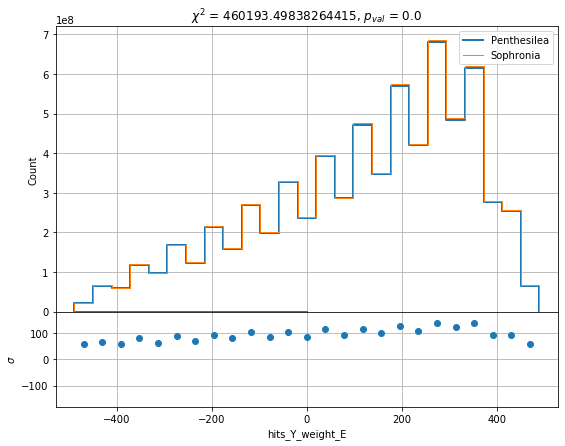

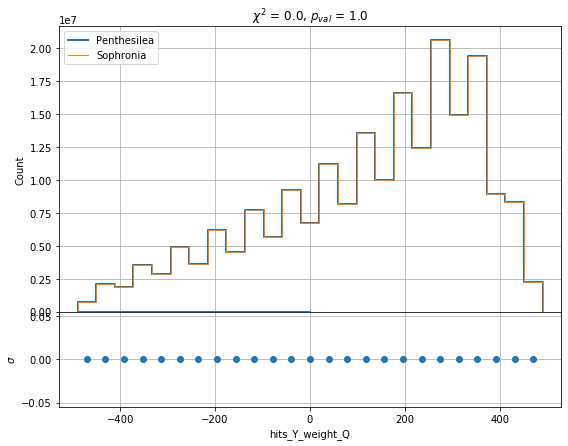

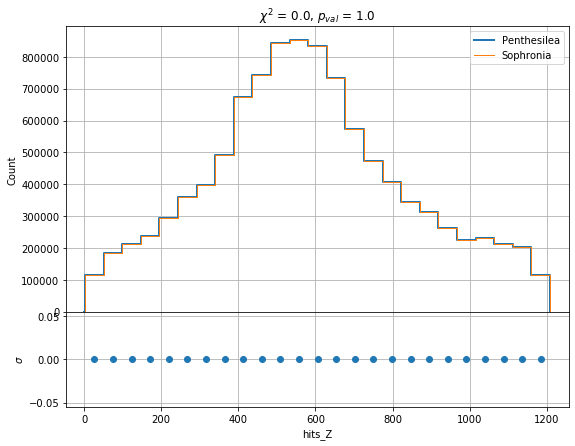

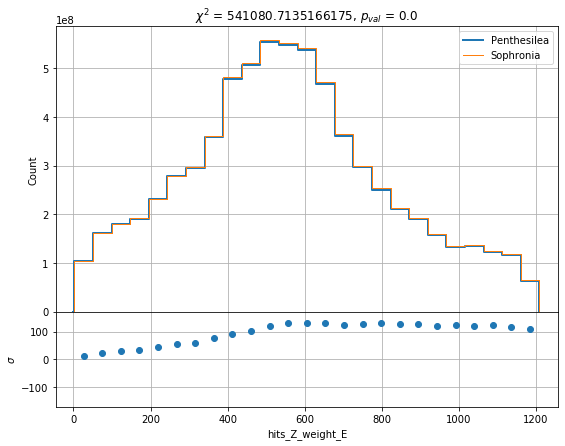

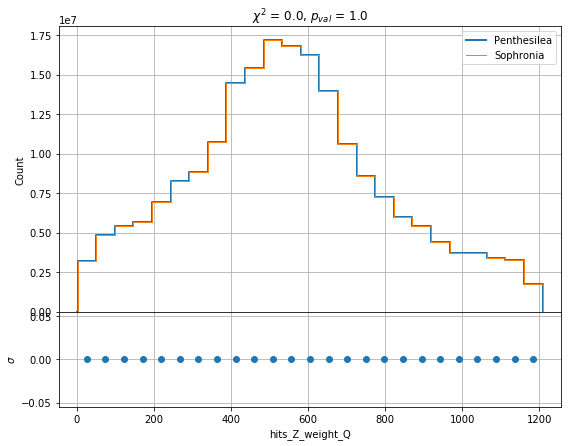

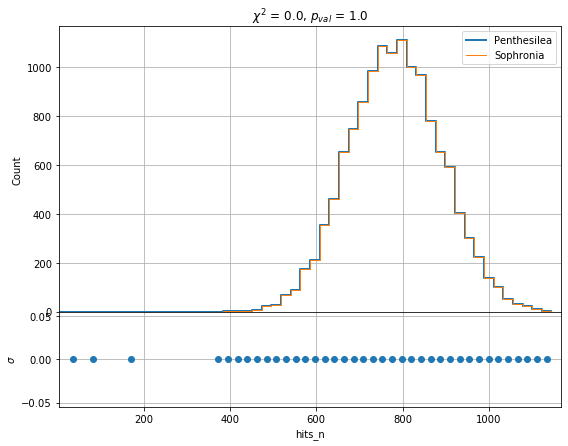

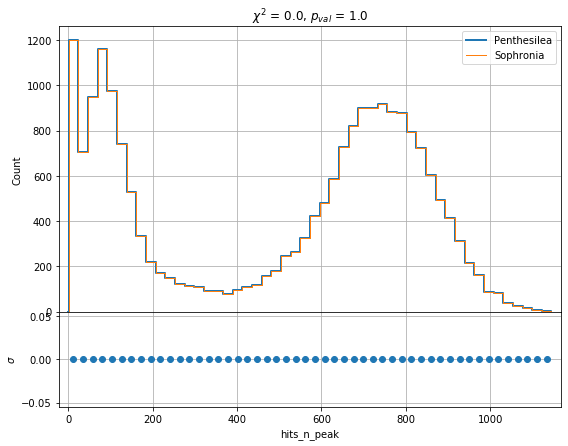

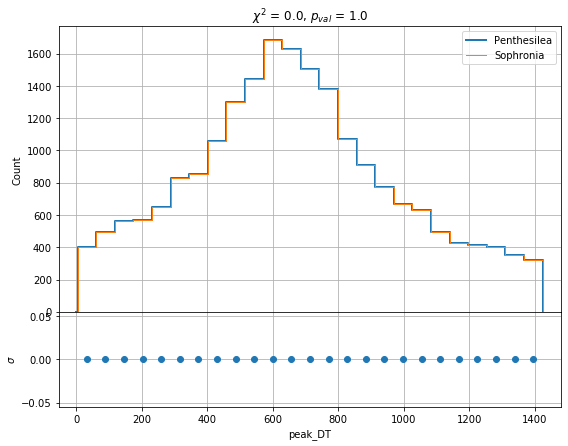

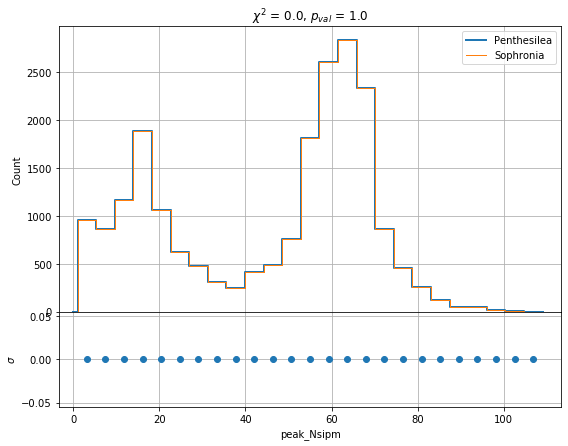

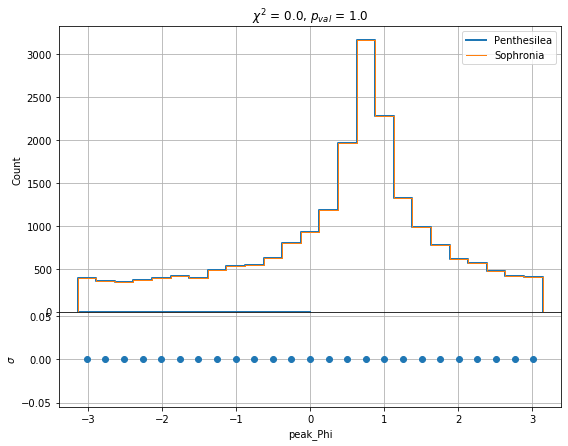

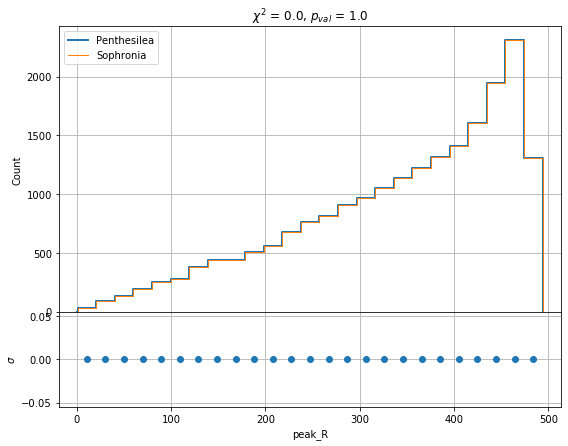

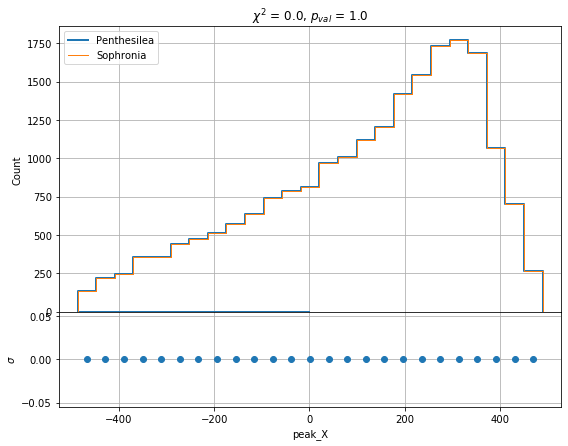

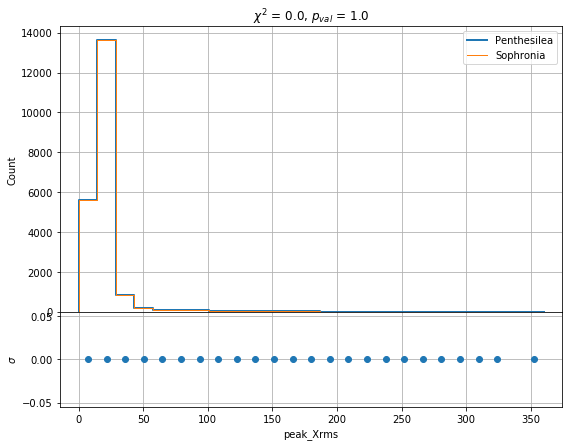

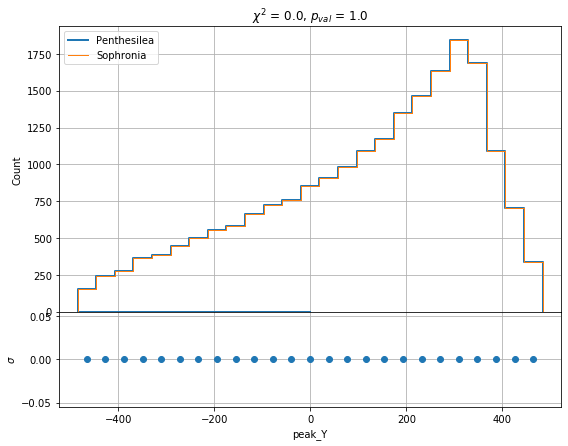

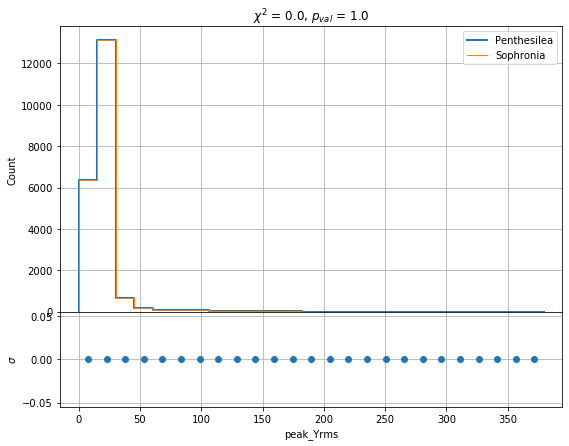

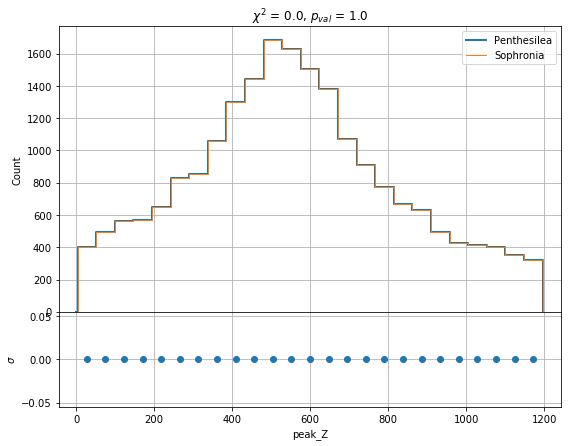

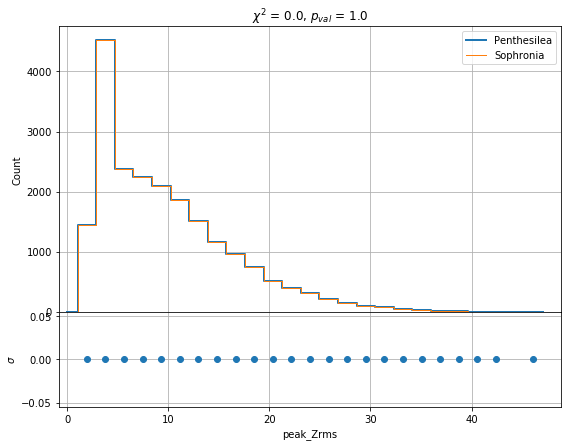

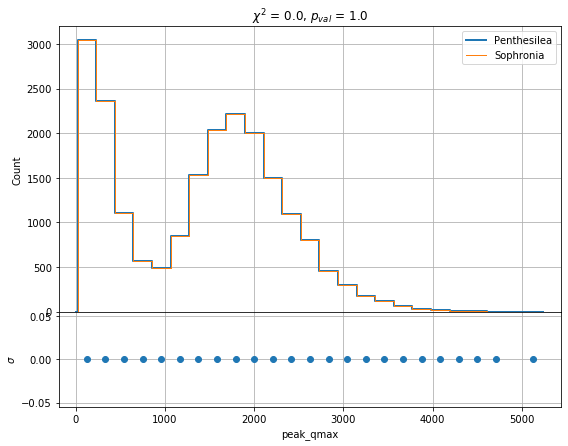

In [16]:
group_names, node_names = get_group_nodes_names(pen_100_path)
for n in node_names[0]:
    if n.split('_')[-1] == 'cut':
        continue
    #plot_hist_comparison(pen_100_path, sop_100_path, 'penthesilea', 'sophronia', n)
    plot_hist_comparison(pen_comp_100_path, pen_comp_100_path, 'penthesilea', 'sophronia', n, scale = 'linear', legend1='Penthesilea', legend2='Sophronia')
    #plt.savefig('show_plots/penthesilea/penth_comp_' + n + '.png')
    plt.show()

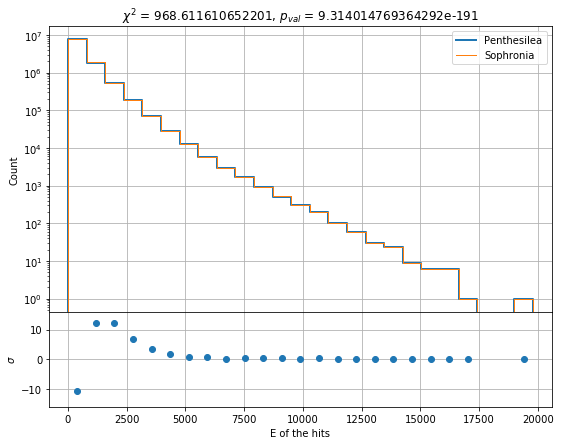

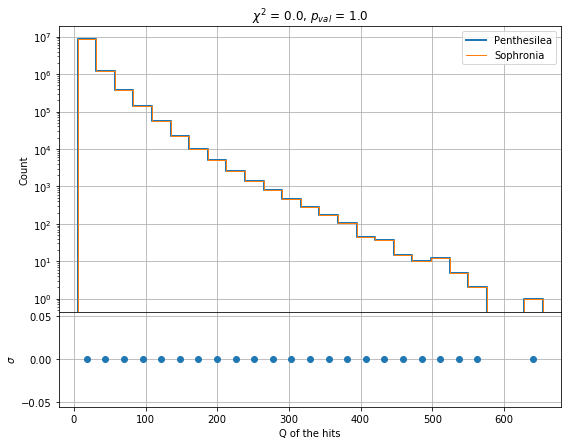

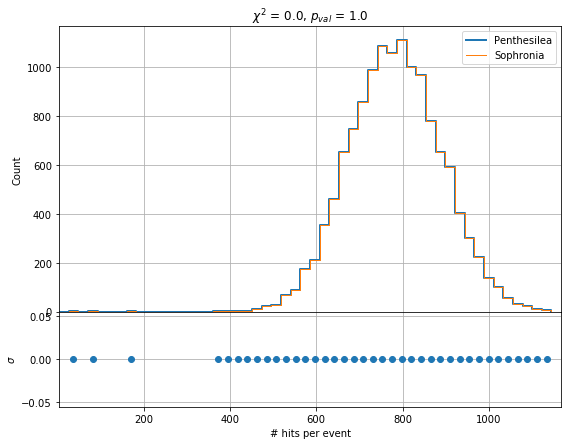

In [17]:
plot_hist_comparison(pen_comp_100_path, pen_comp_100_path, 'penthesilea', 'sophronia', 'hits_E', scale = 'log', legend1='Penthesilea', legend2='Sophronia', title = 'E of the hits')
plot_hist_comparison(pen_comp_100_path, pen_comp_100_path, 'penthesilea', 'sophronia', 'hits_Q', scale = 'log', legend1='Penthesilea', legend2='Sophronia', title = 'Q of the hits')
plot_hist_comparison(pen_comp_100_path, pen_comp_100_path, 'penthesilea', 'sophronia', 'hits_n', scale = 'linear', legend1='Penthesilea', legend2='Sophronia', title = '# hits per event')

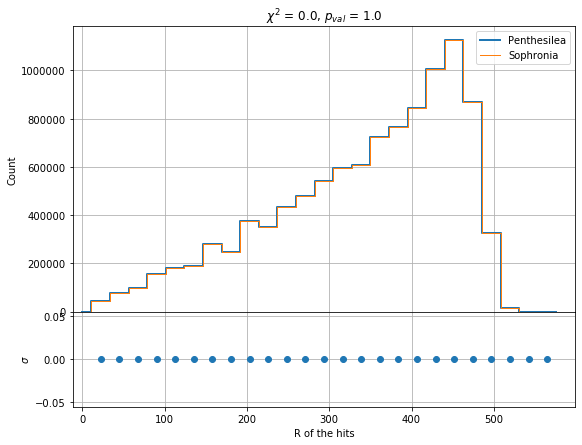

In [18]:
pen_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/old_prod/penthesilea/*', 'penthesilea')
sop_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/refactor_prod/sophronia/*', 'penthesilea')

reco_hits = get_files_contents(pen_path, 'RECO', 'Events')
reco_hits = reco_hits[(reco_hits.Q > -1) & (reco_hits.Xpeak > -1000)]

reco_hits_sop = get_files_contents(sop_path, 'RECO', 'Events')
reco_hits_sop = reco_hits_sop[(reco_hits_sop.Q > -1) & (reco_hits_sop.Xpeak > -1000)]

pen_R = np.sqrt(reco_hits.X **2 + reco_hits.Y **2)
sop_R = np.sqrt(reco_hits_sop.X **2 + reco_hits_sop.Y **2)

xrange = min(min(pen_R), min(sop_R)), max(max(pen_R), max(sop_R))
pen_Rhist = create_hist_df_simple(pen_R, 25, xrange = xrange)
sop_Rhist = create_hist_df_simple(sop_R, 25, xrange = xrange)

plot_hist_comparison(pen_Rhist, sop_Rhist, 'penthesilea', 'sophronia', 'R of the hits', scale = 'linear', legend1='Penthesilea', legend2='Sophronia')


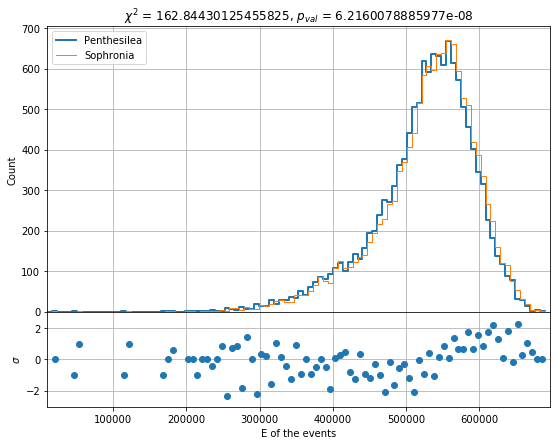

In [42]:
totE_pen = reco_hits.groupby('event').E.sum()
totE_sop = reco_hits_sop.groupby('event').E.sum() 

xrange = min(min(totE_pen), min(totE_sop)), max(max(totE_pen), max(totE_sop))#(1.56, 1.62)#

pen_totE = create_hist_df_simple(totE_pen, 100, xrange=xrange)
sop_totE = create_hist_df_simple(totE_sop, 100, xrange=xrange)

plot_hist_comparison(pen_totE, sop_totE, 'penthesilea', 'sophronia', 'E of the events', scale = 'linear', legend1='Penthesilea', legend2='Sophronia')


## Comparación Esmeralda

In [19]:
esm_old_100_path = '/Users/mperez/NEXT/ic_dev/files/old_prod/hist_esm_n100.h5'
esm_ref_100_path = '/Users/mperez/NEXT/ic_dev/files/refactor_prod/hist_esm_n100.h5'
esm_comp_100_path = '/Users/mperez/NEXT/ic_dev/files/esm_comp_n100.h5'

In [20]:
results = get_chi2_stats(esm_old_100_path, esm_ref_100_path, 'esmeralda')

In [21]:
results_ = get_chi2_stats(esm_comp_100_path, esm_comp_100_path, 'esmeralda', tag = ('old', 'ref'))

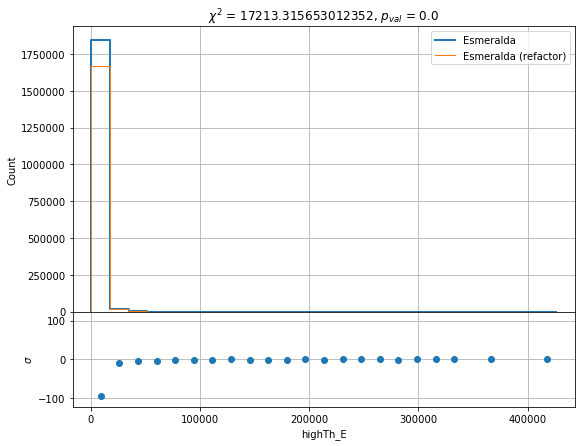

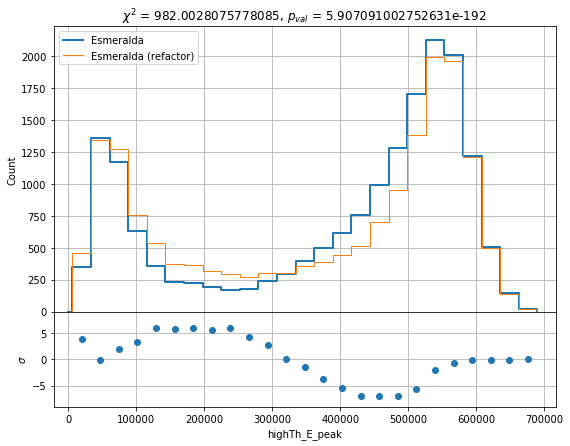

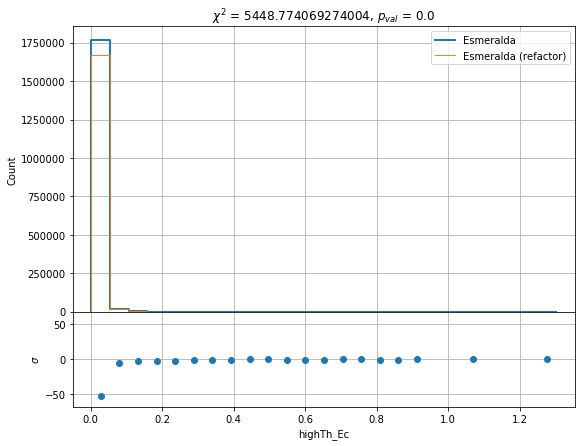

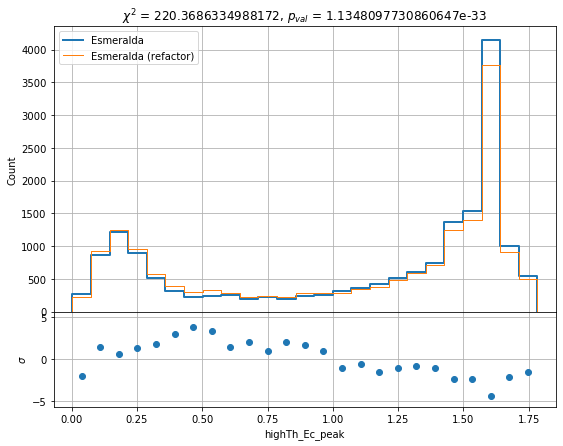

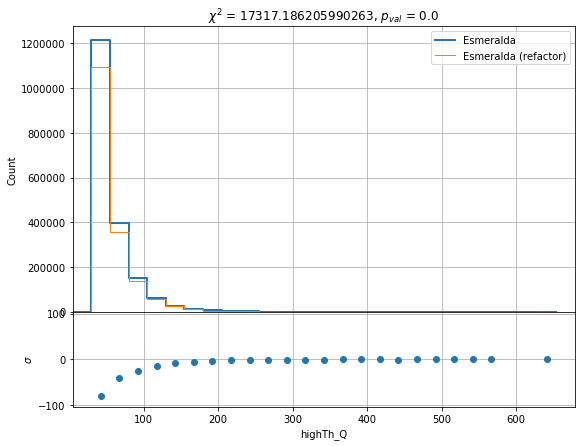

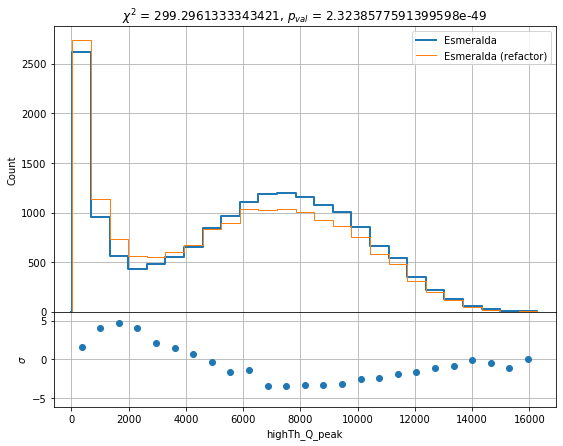

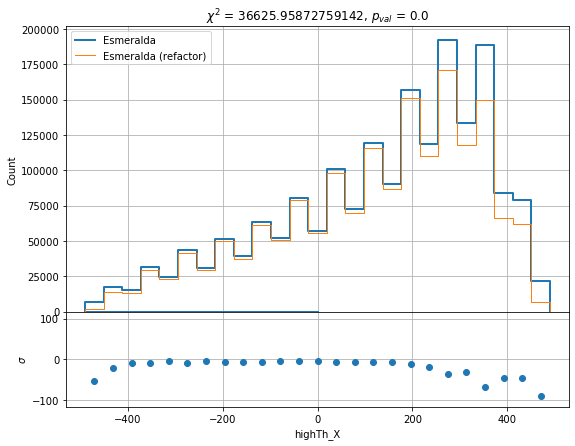

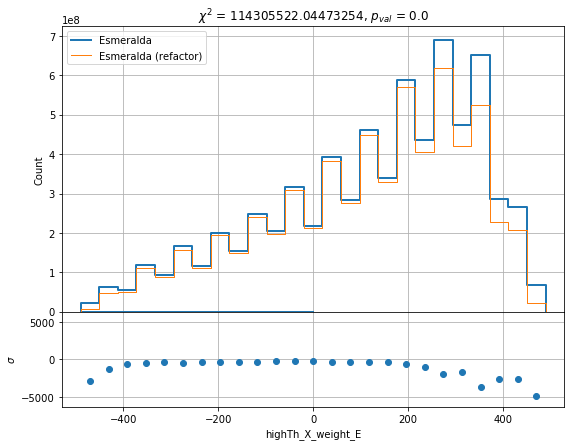

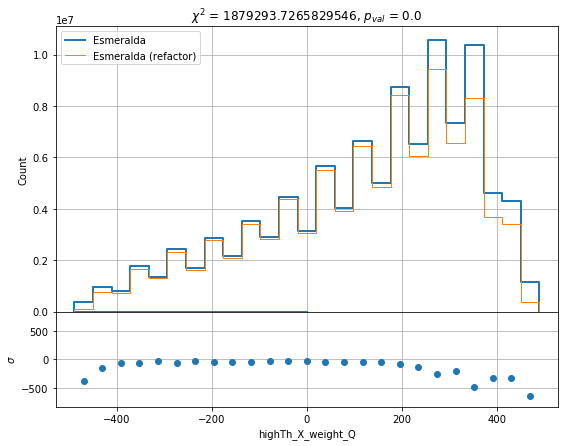

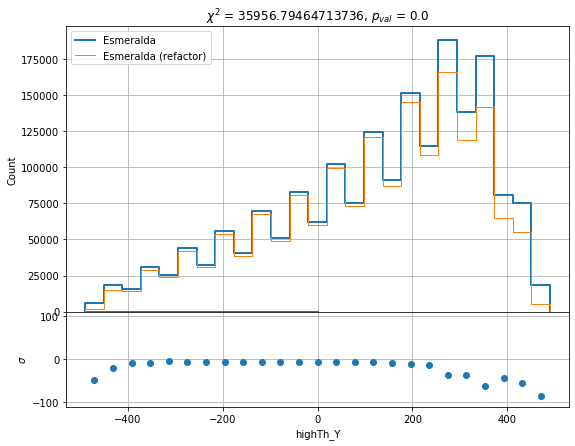

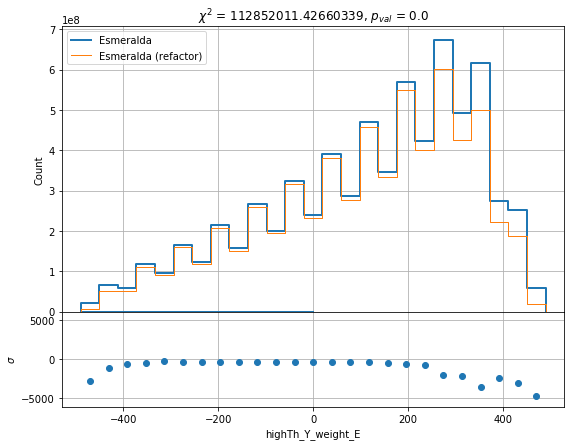

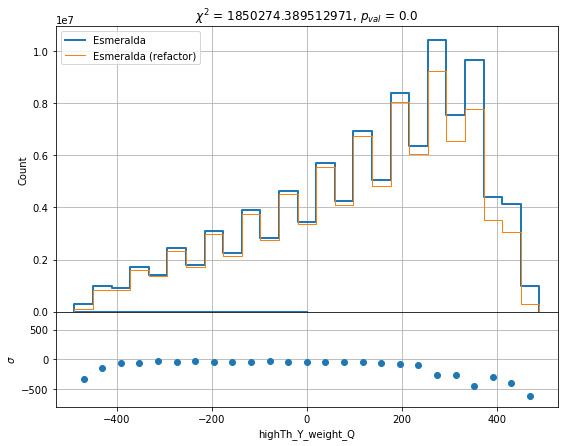

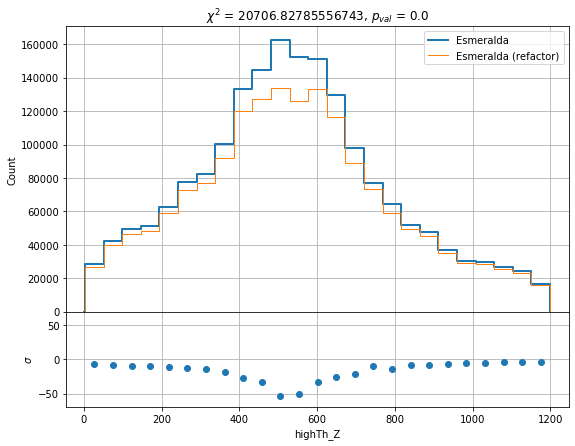

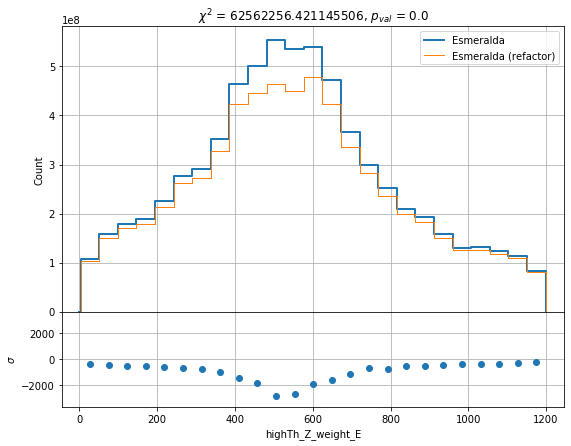

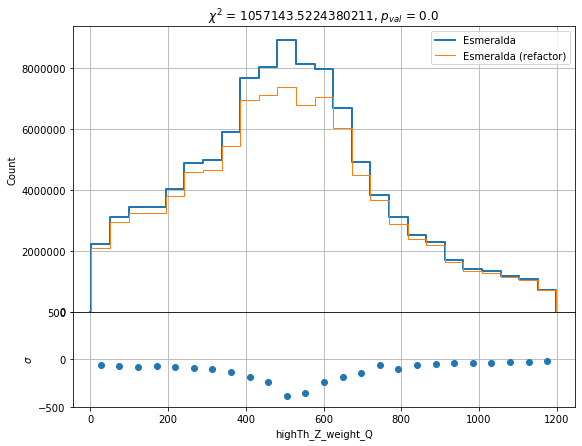

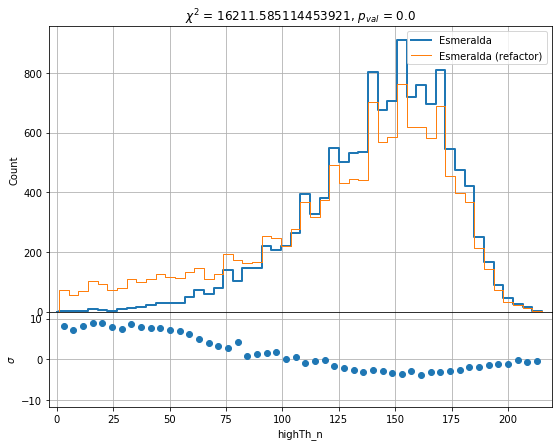

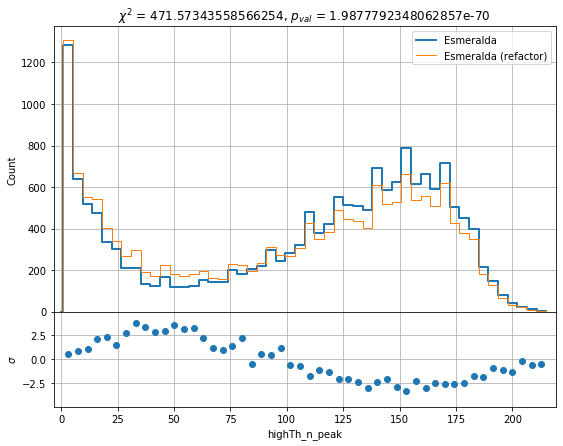

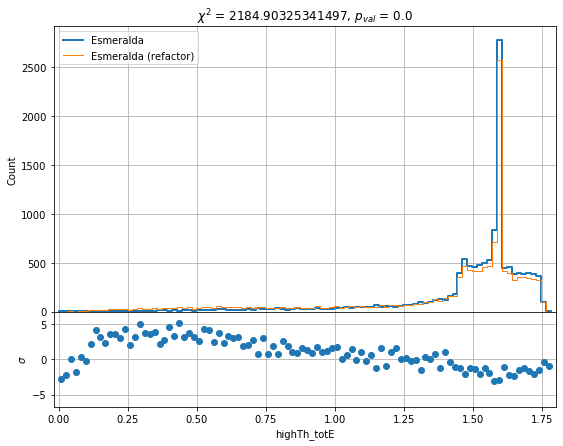

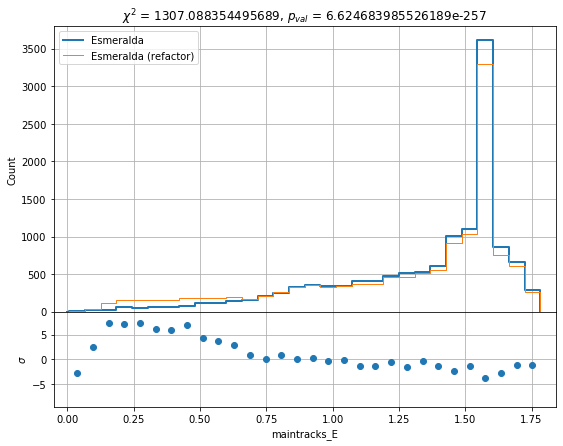

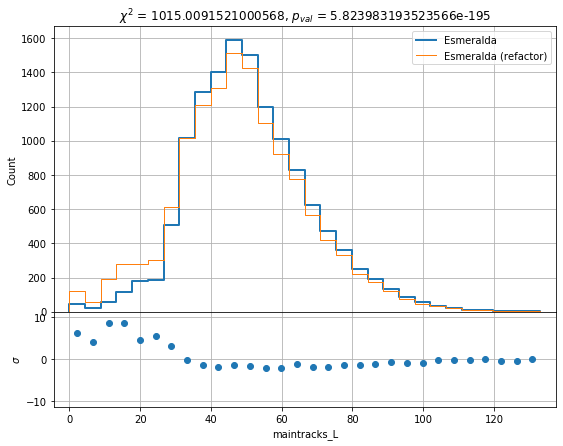

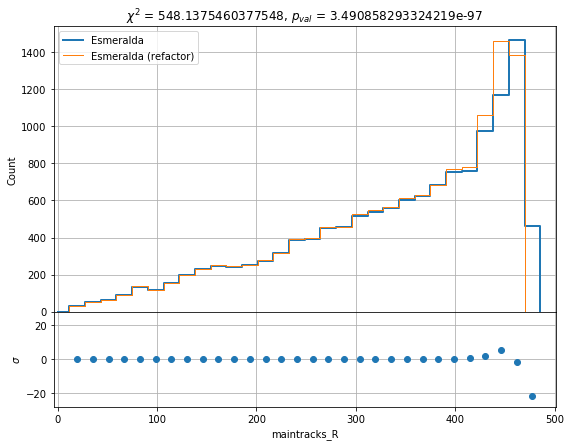

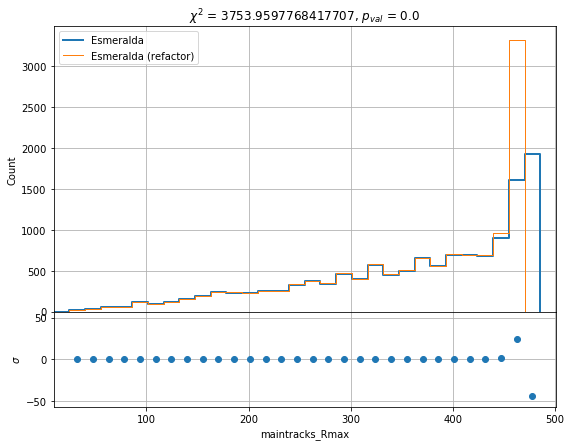

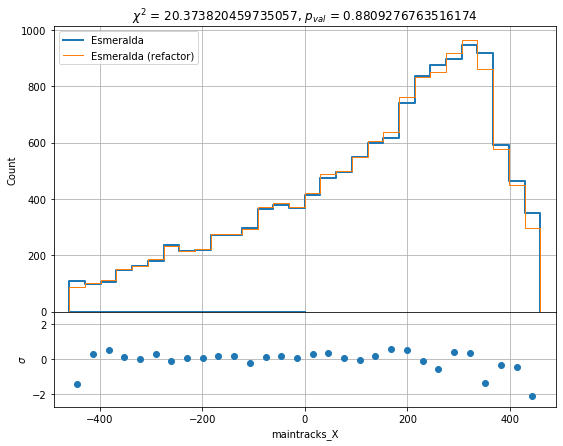

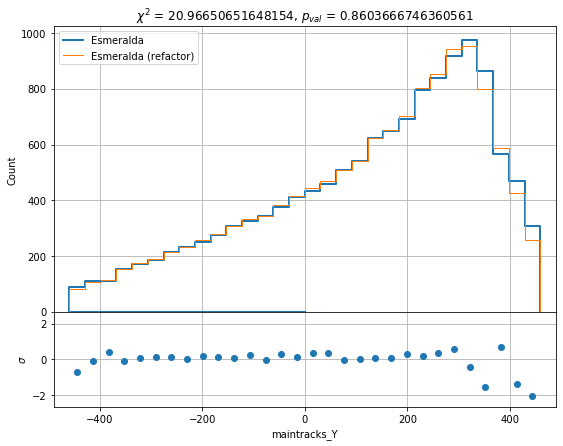

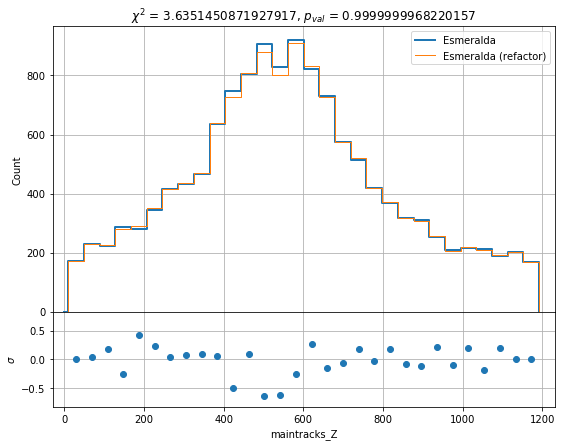

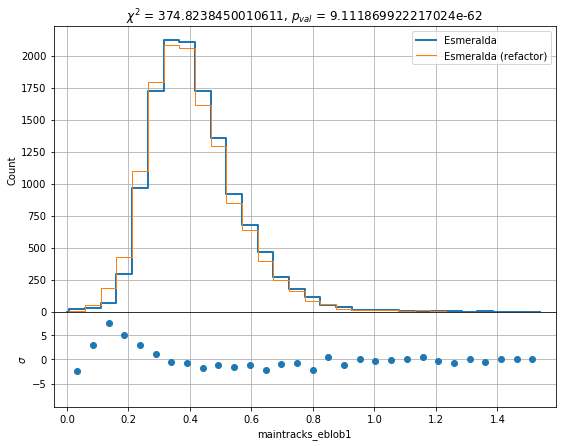

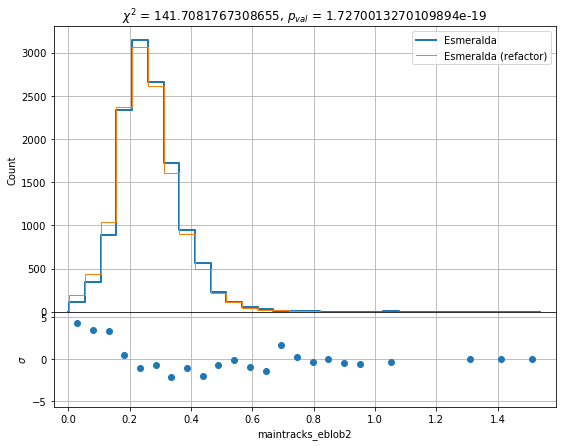

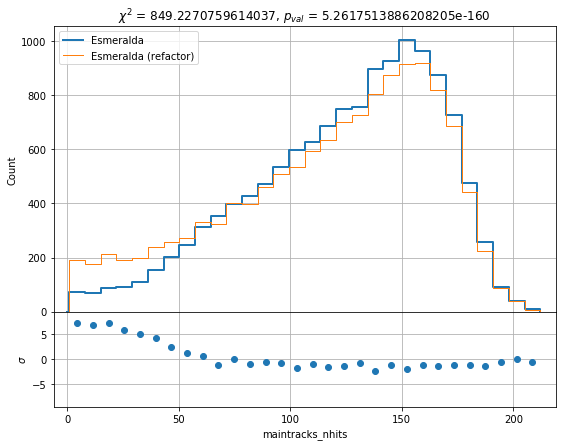

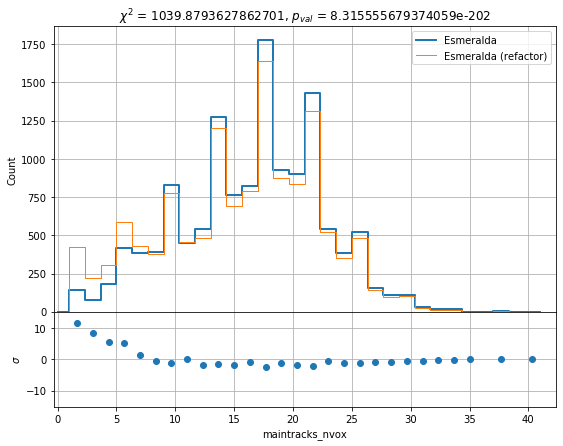

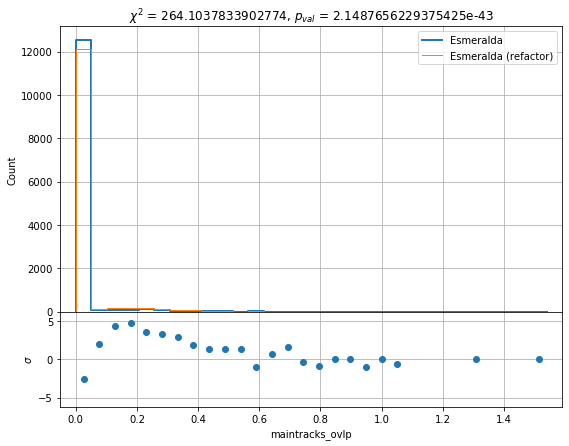

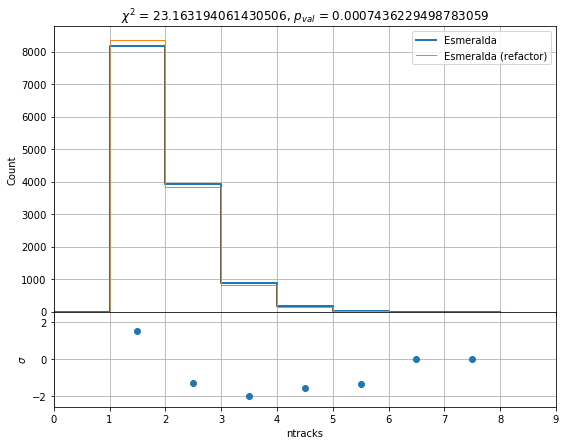

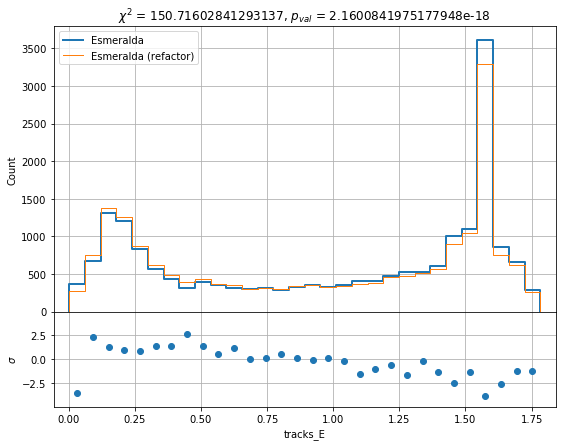

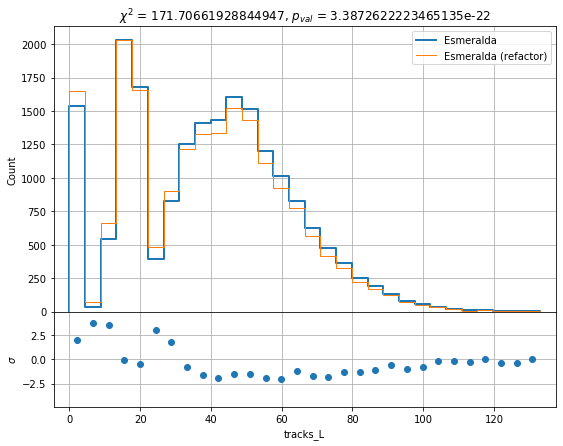

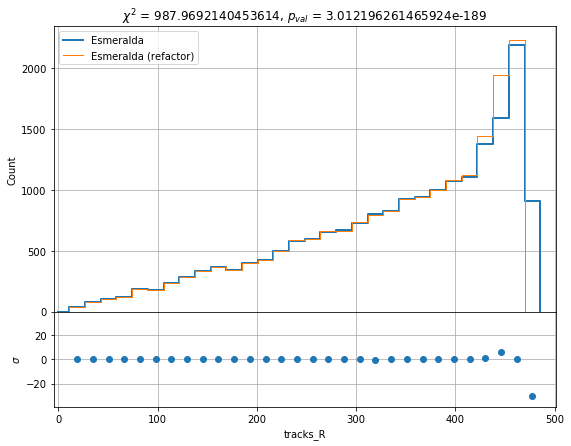

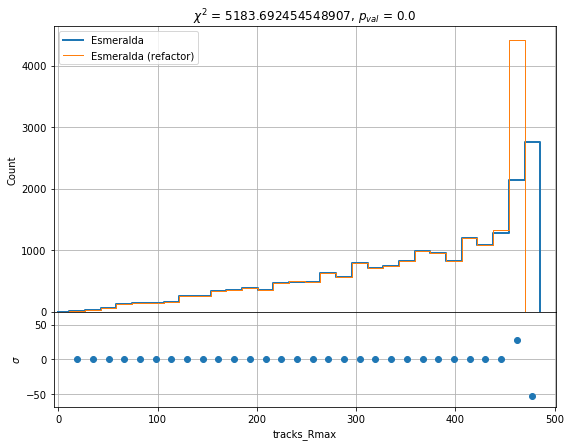

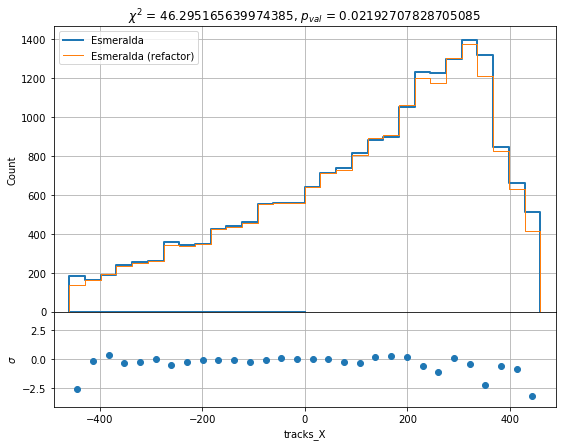

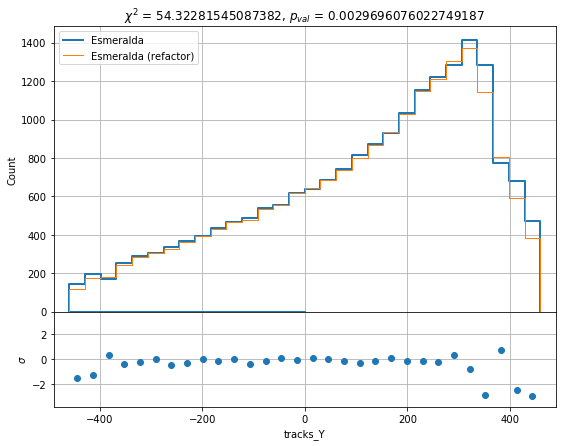

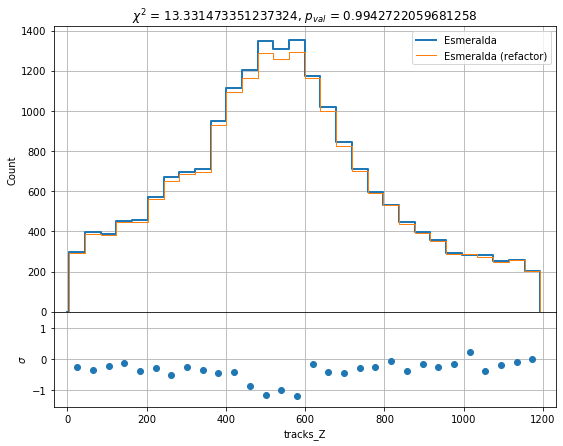

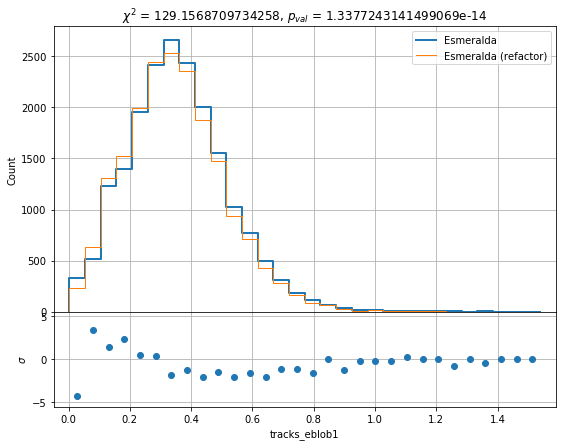

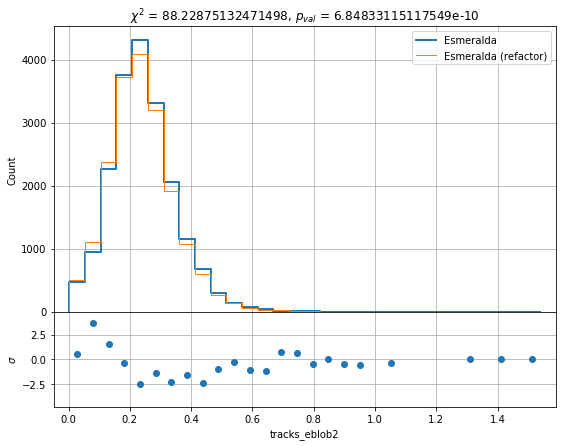

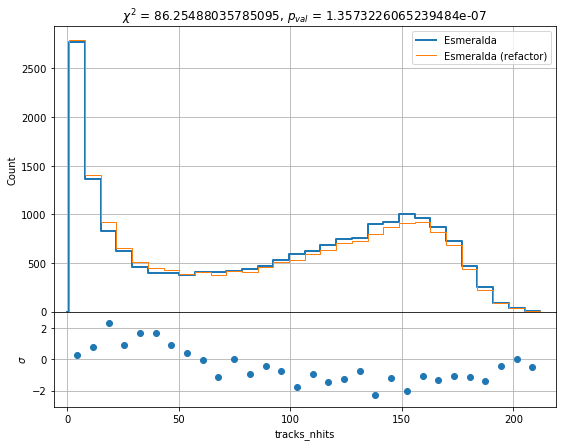

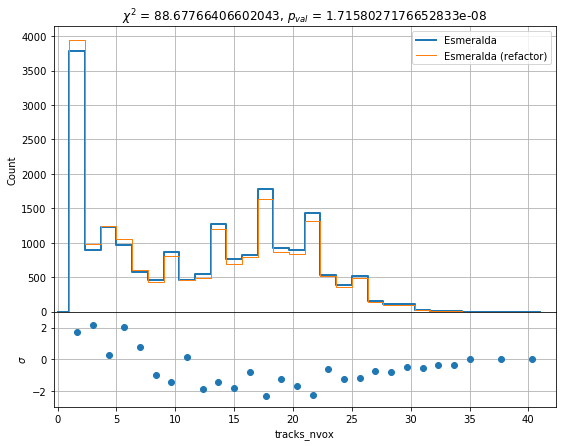

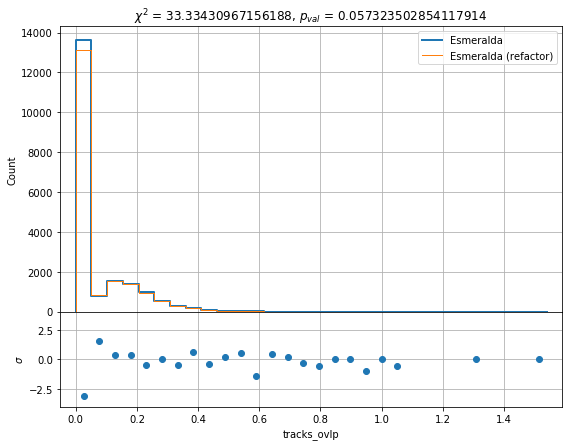

In [22]:
group_names, node_names = get_group_nodes_names(esm_old_100_path)
for n in node_names[0]:
    if n.split('_')[-1] == 'cut':
        continue
    if n[0:3] == 'low':
        continue
    #plot_hist_comparison(esm_old_100_path, esm_ref_100_path, 'esmeralda', 'esmeralda', n)
    plot_hist_comparison(esm_comp_100_path, esm_comp_100_path, 'esmeraldaold', 'esmeraldaref', n, legend1 = 'Esmeralda', legend2='Esmeralda (refactor)')
    #plt.savefig('show_plots/esmeralda/esm_comp_' + n + '.png')
    plt.show()

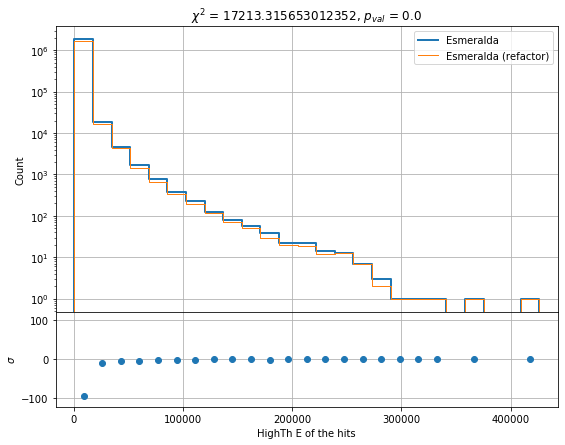

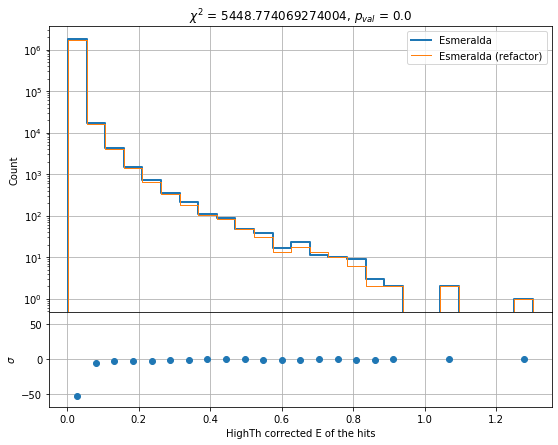

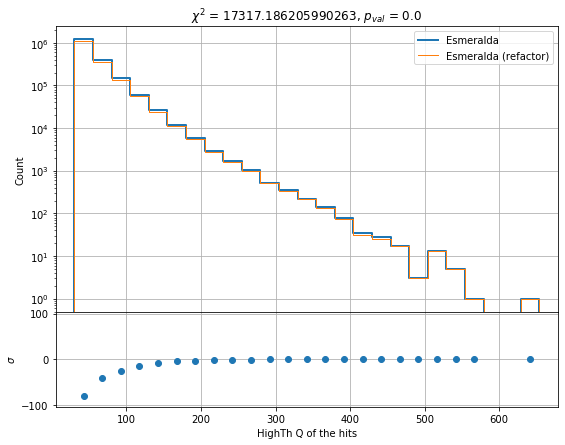

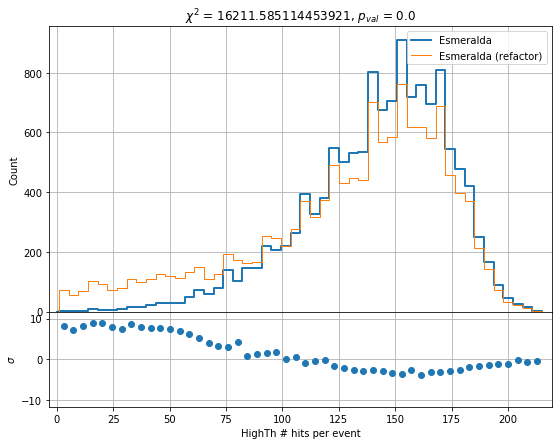

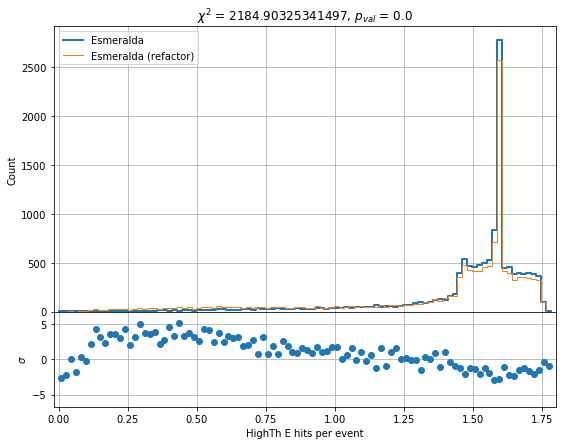

In [25]:
plot_hist_comparison(esm_comp_100_path, esm_comp_100_path, 'esmeraldaold', 'esmeraldaref', 'highTh_E', scale = 'log', legend1 = 'Esmeralda', legend2='Esmeralda (refactor)', title = 'HighTh E of the hits')
plot_hist_comparison(esm_comp_100_path, esm_comp_100_path, 'esmeraldaold', 'esmeraldaref', 'highTh_Ec', scale = 'log', legend1 = 'Esmeralda', legend2='Esmeralda (refactor)', title = 'HighTh corrected E of the hits')
plot_hist_comparison(esm_comp_100_path, esm_comp_100_path, 'esmeraldaold', 'esmeraldaref', 'highTh_Q', scale = 'log', legend1 = 'Esmeralda', legend2='Esmeralda (refactor)', title = 'HighTh Q of the hits')
plot_hist_comparison(esm_comp_100_path, esm_comp_100_path, 'esmeraldaold', 'esmeraldaref', 'highTh_n', legend1 = 'Esmeralda', legend2='Esmeralda (refactor)', title = 'HighTh # hits per event')
plot_hist_comparison(esm_comp_100_path, esm_comp_100_path, 'esmeraldaold', 'esmeraldaref', 'highTh_totE', legend1 = 'Esmeralda', legend2='Esmeralda (refactor)', title = 'HighTh E hits per event')


0.008022184542708482
0.007574918078751919
0.007695947309430499
0.007574918078751919


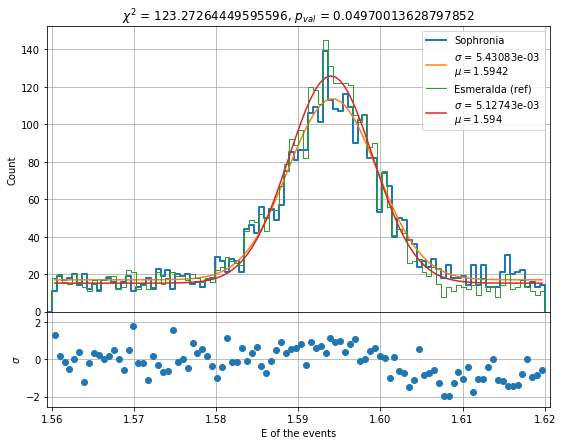

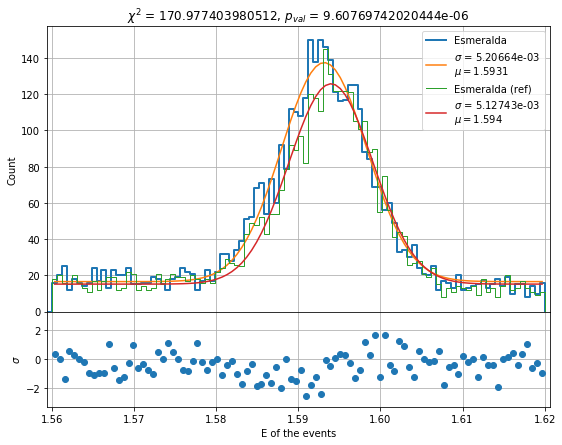

In [24]:
esm_old_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/old_prod/esmeralda/*', 'esmeralda')
esm_ref_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/refactor_prod/esmeralda/*', 'esmeralda')

esm_old_hits = get_files_contents(esm_old_path, 'CHITS', 'highTh')
clean_esm_old_hits = esm_old_hits[esm_old_hits.Ypeak> -1000]
esm_ref_hits = get_files_contents(esm_ref_path, 'CHITS', 'highTh')
clean_esm_ref_hits = esm_ref_hits[esm_ref_hits.Ypeak> -1000]

totE_old = clean_esm_old_hits.groupby('event').Ec.sum()
totE_ref = clean_esm_ref_hits.groupby('event').Ec.sum() 
totE_sop = reco_hits_sop.groupby('event').Ec.sum()
xrange = (1.56, 1.62)#min(min(totE_old), min(totE_ref)), max(max(totE_old), max(totE_ref))#

esm_old_totE = create_hist_df_simple(totE_old, 100, xrange=xrange)
esm_ref_totE = create_hist_df_simple(totE_ref, 100, xrange=xrange)
sop_totE = create_hist_df_simple(totE_sop, 100, xrange=xrange)

plot_hist_comparison(sop_totE, esm_ref_totE, 'esmeralda', 'esmeralda', 'E of the events', scale = 'linear', legend1='Sophronia', legend2='Esmeralda (ref)', fit = True)
plot_hist_comparison(esm_old_totE, esm_ref_totE, 'esmeralda', 'esmeralda', 'E of the events', scale = 'linear', legend1='Esmeralda', legend2='Esmeralda (ref)', fit = True)


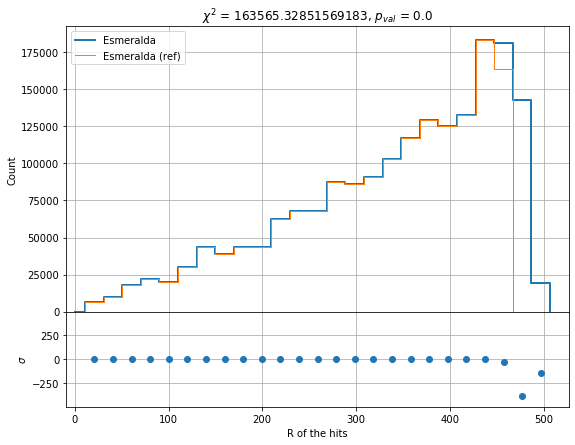

In [46]:
esm_R_old = np.sqrt(clean_esm_old_hits.X **2 + clean_esm_old_hits.Y **2)
esm_R_ref = np.sqrt(clean_esm_ref_hits.X **2 + clean_esm_ref_hits.Y **2)

xrange = min(min(esm_R_old), min(esm_R_ref)), max(max(esm_R_old), max(esm_R_ref))
esm_Rhist_old = create_hist_df_simple(esm_R_old, 25, xrange = xrange)
esm_Rhist_ref = create_hist_df_simple(esm_R_ref, 25, xrange = xrange)

plot_hist_comparison(esm_Rhist_old, esm_Rhist_ref, 'esmeralda', 'esmeralda', 'R of the hits', scale = 'linear', legend1='Esmeralda', legend2='Esmeralda (ref)')


0.007689632088397589
0.007650631265500817
0.007689632088397589
0.007650631265500817


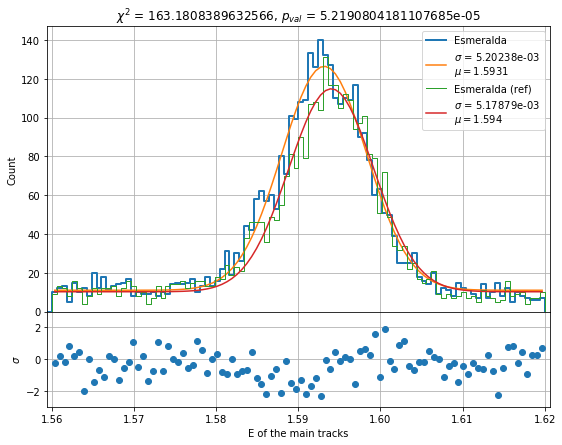

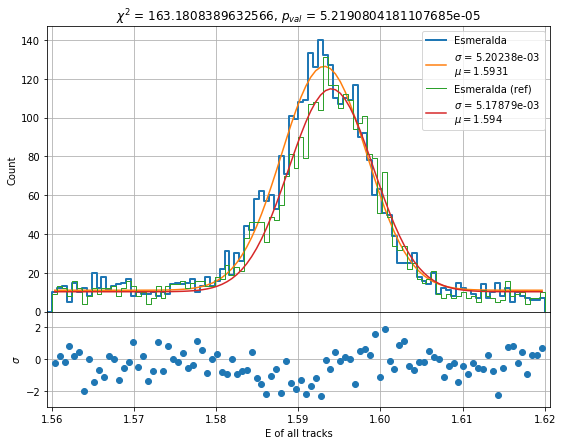

In [26]:
esm_old_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/old_prod/esmeralda/*', 'esmeralda')
esm_ref_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/refactor_prod/esmeralda/*', 'esmeralda')

esm_old_tracks = get_files_contents(esm_old_path, 'Tracking', 'Tracks')
esm_ref_tracks = get_files_contents(esm_ref_path, 'Tracking', 'Tracks')

main_old_tracks = esm_old_tracks[esm_old_tracks.trackID == 0].energy
main_ref_tracks = esm_ref_tracks[esm_ref_tracks.trackID == 0].energy

xrange_tr = (1.56, 1.62)#min(min(main_old_tracks), min(main_ref_tracks)), max(max(main_old_tracks), max(main_ref_tracks))#

maintr_old_hist = create_tracks_hist(esm_old_tracks, 'energy', nbins = 100, xrange = [xrange_tr, xrange_tr])
maintr_ref_hist = create_tracks_hist(esm_ref_tracks, 'energy', nbins = 100, xrange = [xrange_tr, xrange_tr])

plot_hist_comparison(maintr_old_hist[1], maintr_ref_hist[1], 'esmeralda', 'esmeralda', 'E of the main tracks', scale = 'linear', legend1='Esmeralda', legend2='Esmeralda (ref)', fit = True)
plot_hist_comparison(maintr_old_hist[0], maintr_ref_hist[0], 'esmeralda', 'esmeralda', 'E of all tracks', scale = 'linear', legend1='Esmeralda', legend2='Esmeralda (ref)', fit = True)

In [25]:
esm_old_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/old_prod/esmeralda/*', 'esmeralda')
esm_ref_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/refactor_prod/esmeralda/*', 'esmeralda')

old_trks_ = get_files_contents(esm_old_path, 'Tracking', 'Tracks')
ref_trks_ = get_files_contents(esm_ref_path, 'Tracking', 'Tracks')

In [26]:
rlim = 0 #460

old_trks = old_trks_[old_trks_.r_max > rlim]
ref_trks = ref_trks_[ref_trks_.r_max > rlim]

DIFERENTE NUMERO DE TRACKS... CHEKIAR

In [27]:
mask = np.isin(ref_trks[['event', 'numb_of_tracks']].drop_duplicates(), old_trks[['event', 'numb_of_tracks']].drop_duplicates()).all(axis = 1)

In [28]:
#tracks that are not found in old paolina
not_found_trks = ref_trks[['event', 'numb_of_tracks']].drop_duplicates()[~mask]


In [29]:
esm_old_hits[np.isin(esm_old_hits.event, not_found_trks.event)].Ec.isnull().sum()

0

In [30]:
esm_ref_hits[np.isin(esm_ref_hits.event, not_found_trks.event)].Ec.isnull().sum()

0

The tracks that don't even appear in old paolina are those that have all their hits with NaN Ec

Then, usually in one track there are some hits with NaN in the old production, and that's why there is a energy difference (old energy is a little below the ref energy). The NaN hits are not considered by Paolina!!

In [32]:
#events that don't have the same number of tracks in both productions
mask_df = pd.merge(ref_trks[['event', 'numb_of_tracks']].drop_duplicates(), old_trks[['event', 'numb_of_tracks']].drop_duplicates(), on=['event','numb_of_tracks'], how='left', indicator='Exist')
mask_df['Exist'] = np.where(mask_df.Exist == 'both', True, False)
no_match_events = mask_df[~mask_df.Exist].event


In [33]:
esm_old_hits[np.isin(esm_old_hits.event, no_match_events)].Ec.isnull().sum()

5215

In [34]:
esm_ref_hits[np.isin(esm_ref_hits.event, no_match_events)].Ec.isnull().sum()

0

In [35]:
old_trks[old_trks.event == 0]

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,0.955102,58.149943,17,104,2,334.325,272.125,517.871602,...,522.747723,349.875,318.775,550.154412,0.240735,0.095459,0.000000,14.546774,13.328571,14.978519
1,0,1,0.111715,13.328571,2,3,2,-85.525,241.025,375.897979,...,376.487307,-85.525,256.575,375.897979,0.111715,0.111715,0.111715,14.546774,13.328571,14.978519


In [36]:
ref_trks[ref_trks.event == 0]

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,0.921197,45.184462,16,96,2,334.325,272.125,517.871582,...,522.407929,365.425,287.675,555.640198,0.246937,0.043122,0.000000,14.546774,12.44,14.978518
1,0,1,0.112234,12.440000,2,3,2,-85.525,241.025,375.897980,...,375.897980,-85.525,241.025,376.487105,0.112234,0.112234,0.112234,14.546774,12.44,14.978518


In [37]:
old_trks.head(10)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,0.955102,58.149943,17,104,2,334.325,272.125,517.871602,...,522.747723,349.875,318.775,550.154412,0.240735,0.095459,0.000000,14.546774,13.328571,14.978519
1,0,1,0.111715,13.328571,2,3,2,-85.525,241.025,375.897979,...,376.487307,-85.525,256.575,375.897979,0.111715,0.111715,0.111715,14.546774,13.328571,14.978519
2,2,0,1.587056,100.781877,28,168,1,256.575,163.275,511.987192,...,522.577878,318.775,256.575,531.727869,0.314730,0.302115,0.000000,12.958333,13.606250,12.165248
3,4,0,0.920537,40.076782,10,73,3,-380.975,-38.875,255.763935,...,278.697806,-349.875,-38.875,256.640174,0.536681,0.482113,0.132168,14.513333,14.974074,14.613058
4,4,1,0.411524,20.853291,4,33,3,-349.875,-38.875,218.835199,...,228.724443,-334.325,-23.325,220.616025,0.361444,0.198541,0.148461,14.513333,14.974074,14.613058
5,4,2,0.283332,20.853291,3,21,3,38.875,318.775,431.350579,...,435.047498,38.875,318.775,435.101744,0.258527,0.151309,0.126504,14.513333,14.974074,14.613058
6,6,0,1.463518,52.045246,15,138,1,209.925,178.825,509.477115,...,514.070396,241.025,209.925,550.335553,0.269003,0.234144,0.000000,11.662500,10.366667,14.822763
7,8,0,1.329235,55.026227,16,127,3,272.125,303.225,386.824646,...,389.291971,318.775,318.775,406.729503,0.349097,0.336211,0.000000,14.772500,14.607576,14.754149
8,8,1,0.164771,0.000000,1,1,3,38.875,-54.425,726.170077,...,726.170077,38.875,-54.425,726.170077,0.164771,0.164771,0.164771,14.772500,14.607576,14.754149
9,8,2,0.084490,0.000000,1,8,3,38.875,-132.175,407.815564,...,410.920020,38.875,-132.175,410.920020,0.084490,0.084490,0.084490,14.772500,14.607576,14.754149


In [38]:
ref_trks.head(10)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,0.921197,45.184462,16,96,2,334.325,272.125,517.871582,...,522.407929,365.425,287.675,555.640198,0.246937,0.043122,0.000000,14.546774,12.440000,14.978518
1,0,1,0.112234,12.440000,2,3,2,-85.525,241.025,375.897980,...,375.897980,-85.525,241.025,376.487105,0.112234,0.112234,0.112234,14.546774,12.440000,14.978518
2,2,0,1.591866,100.781880,28,168,1,256.575,163.275,511.987183,...,522.578775,318.775,256.575,531.754058,0.320001,0.302115,0.000000,12.958333,13.606250,12.165253
3,4,0,0.918337,40.076782,10,73,3,-380.975,-38.875,255.763931,...,278.697530,-349.875,-38.875,256.647103,0.533068,0.482616,0.131270,14.513333,14.974074,14.613058
4,4,1,0.410728,20.853291,4,33,3,-349.875,-38.875,218.835190,...,224.056113,-334.325,-38.875,221.476578,0.363690,0.309150,0.262112,14.513333,14.974074,14.613058
5,4,2,0.284044,20.853291,3,21,3,38.875,318.775,431.350586,...,435.047504,38.875,318.775,435.101358,0.258985,0.151676,0.126617,14.513333,14.974074,14.613058
6,6,0,1.466383,52.045233,16,139,1,209.925,178.825,509.477112,...,514.070202,241.025,209.925,550.336912,0.267165,0.230014,0.000000,11.662500,10.366667,14.822754
7,8,0,1.263678,55.026226,16,127,3,272.125,303.225,386.824646,...,389.292576,318.775,318.775,406.773546,0.345150,0.315402,0.000000,14.772500,14.607576,14.754148
8,8,1,0.164885,0.000000,1,1,3,38.875,-54.425,726.170044,...,726.170044,38.875,-54.425,726.170044,0.164885,0.164885,0.164885,14.772500,14.607576,14.754148
9,8,2,0.092459,0.000000,1,8,3,38.875,-132.175,407.815552,...,410.922823,38.875,-132.175,410.922823,0.092459,0.092459,0.092459,14.772500,14.607576,14.754148


In [39]:
nan_hits = esm_old_hits[esm_old_hits.Ec.isnull()]

In [31]:
#nan_hits_in_ref = esm_ref_hits[esm_old_hits.Ec.isnull()]

In [32]:
#np.sqrt(nan_hits_in_ref.X **2 + nan_hits_in_ref.Y **2)

In [33]:
#np.sqrt(nan_hits.X **2 + nan_hits.Y **2).min()

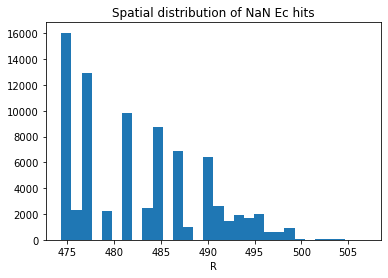

In [ ]:

plt.hist(np.sqrt(nan_hits.X **2 + nan_hits.Y **2), bins = 30)
plt.title('Spatial distribution of NaN Ec hits')
plt.xlabel('R')
plt.show()

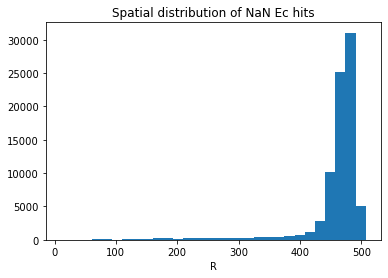

In [200]:

plt.hist(np.sqrt(nan_hits_in_ref.X **2 + nan_hits_in_ref.Y **2), bins = 30)
plt.title('Spatial distribution of NaN Ec hits')
plt.xlabel('R')
plt.show()

1.0758115972089641
1.1432584766066183
0.9287713230465925
0.9810816451321315


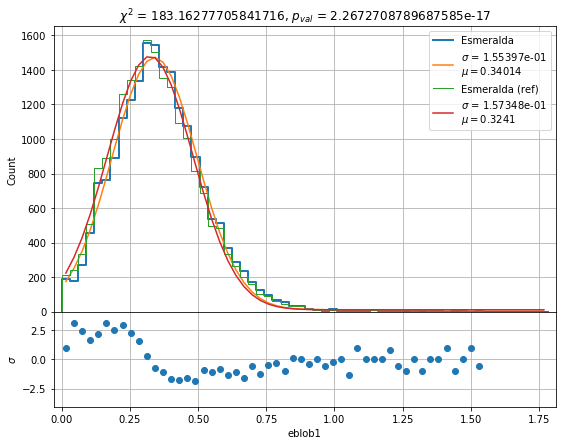

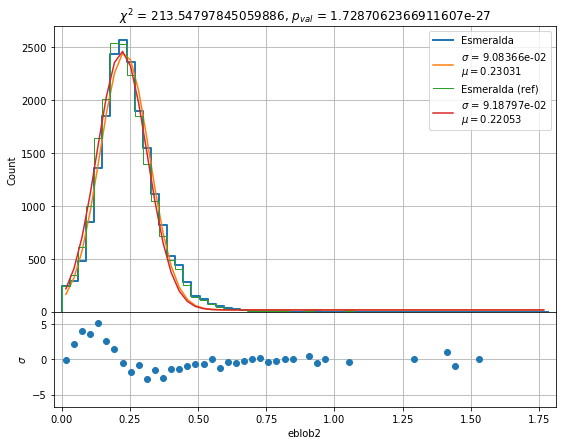

In [51]:
esm_old_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/old_prod/esmeralda/*', 'esmeralda')
esm_ref_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/refactor_prod/test_productions/no_fid_esm/esmeralda/*', 'esmeralda')

old_trks_ = get_files_contents(esm_old_path, 'Tracking', 'Tracks')
ref_trks_ = get_files_contents(esm_ref_path, 'Tracking', 'Tracks')

rlim = 10000

old_trks = old_trks_[old_trks_.r_max < rlim]
ref_trks = ref_trks_[ref_trks_.r_max < rlim]

nbins = 60
eblob1_old = old_trks['eblob1']
eblob2_old = old_trks['eblob2']
eblob1_ref = ref_trks['eblob1']
eblob2_ref = ref_trks['eblob2']

xrange = min(min(totE_old), min(totE_ref)), max(max(totE_old), max(totE_ref))
old_1_hist = create_hist_df_simple(eblob1_old, nbins, xrange = xrange)
ref_1_hist = create_hist_df_simple(eblob1_ref, nbins, xrange = xrange)

old_2_hist = create_hist_df_simple(eblob2_old, nbins, xrange = xrange)
ref_2_hist = create_hist_df_simple(eblob2_ref, nbins, xrange = xrange)

plot_hist_comparison(old_1_hist, ref_1_hist, 'esmeralda', 'esmeralda', 'eblob1', scale = 'linear', legend1='Esmeralda', legend2='Esmeralda (ref)', fit = True)
plot_hist_comparison(old_2_hist, ref_2_hist, 'esmeralda', 'esmeralda', 'eblob2', scale = 'linear', legend1='Esmeralda', legend2='Esmeralda (ref)', fit = True)


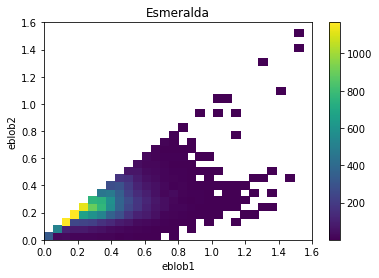

In [47]:
fig, ax = plt.subplots()
h = ax.hist2d(eblob1_old, eblob2_old, bins=30, range = (xrange, xrange), cmin=min(eblob2_ref))
fig.colorbar(h[3], ax=ax)
plt.xlabel('eblob1')
plt.ylabel('eblob2')
plt.title('Esmeralda')
plt.show()

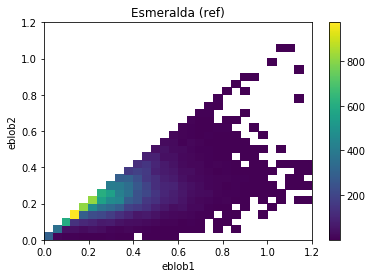

In [129]:
fig, ax = plt.subplots()
h2 = ax.hist2d(eblob1_ref, eblob2_ref, bins=30, range = (xrange, xrange), cmin=min(eblob2_ref))
fig.colorbar(h2[3], ax=ax)
plt.xlabel('eblob1')
plt.ylabel('eblob2')
plt.title('Esmeralda (ref)')
plt.show()

In [121]:
cociente = h[0] / h2[0]

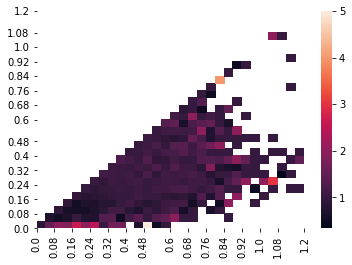

In [145]:
yticks = np.linspace(0, len(h[1]) - 1, 15, dtype=np.int)
# the content of labels of these yticks
yticklabels = [h[1][idx] for idx in yticks]

ax = sns.heatmap(cociente.T, xticklabels = yticklabels, yticklabels=yticklabels)
ax.set_yticks(yticks)
ax.set_xticks(yticks)
ax.invert_yaxis()

In [20]:
sipms = dio.load_dst('sipmdata.h5', 'DB', 'SiPM')

In [55]:
sipms.X.max(), sipms.X.min()

(489.825, -489.825)

In [56]:
sipms.Y.max(), sipms.Y.min()

(489.825, -489.825)

Text(0.5, 1.0, 'Tracking plane')

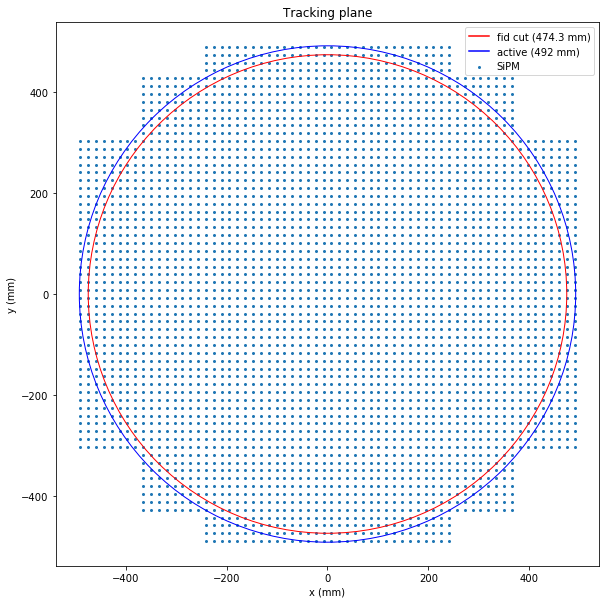

In [67]:
plt.figure(figsize= (10, 10))
plt.gca().set_aspect(1)
plt.scatter(sipms.X, sipms.Y, s = 4, label = 'SiPM')
plt.plot([], [], 'r', label = 'fid cut (474.3 mm)')
plt.gca().add_patch(plt.Circle((0,0),474.3, ec = 'r', fc = 'None'))

plt.plot([], [], 'b', label = 'active (492 mm)')
plt.gca().add_patch(plt.Circle((0,0),492, ec = 'b', fc = 'None'))
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.legend()
plt.title('Tracking plane')

## Comparación Beersheba

In [1]:
bee_old_100_path = '/Users/mperez/NEXT/ic_dev/files/old_prod/hist_bee_n100.h5'
bee_ref_100_path = '/Users/mperez/NEXT/ic_dev/files/refactor_prod/hist_bee_n100.h5'
bee_comp_100_path = '/Users/mperez/NEXT/ic_dev/files/bee_comp_n100.h5'

In [56]:
results = get_chi2_stats(bee_old_100_path, bee_ref_100_path, 'beersheba')

In [57]:
results_ = get_chi2_stats(bee_comp_100_path, bee_comp_100_path, 'beersheba', tag = ('old', 'ref'))

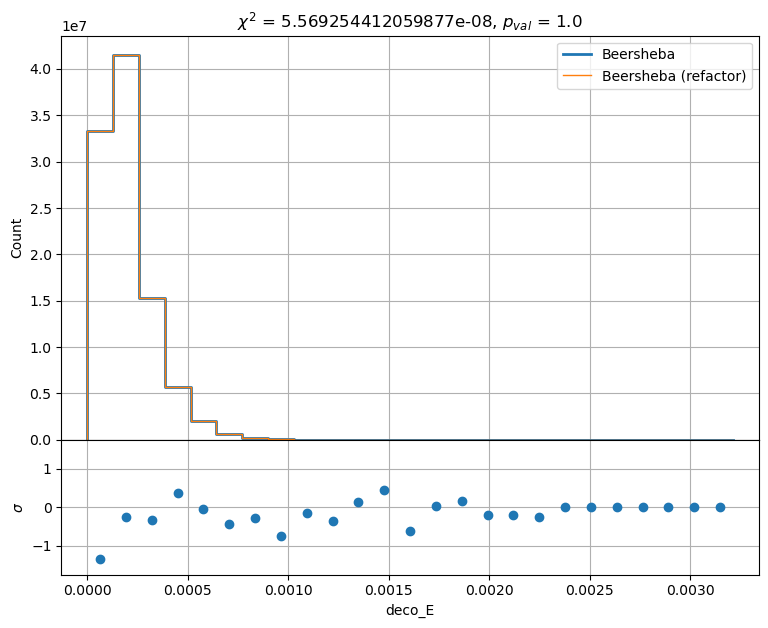

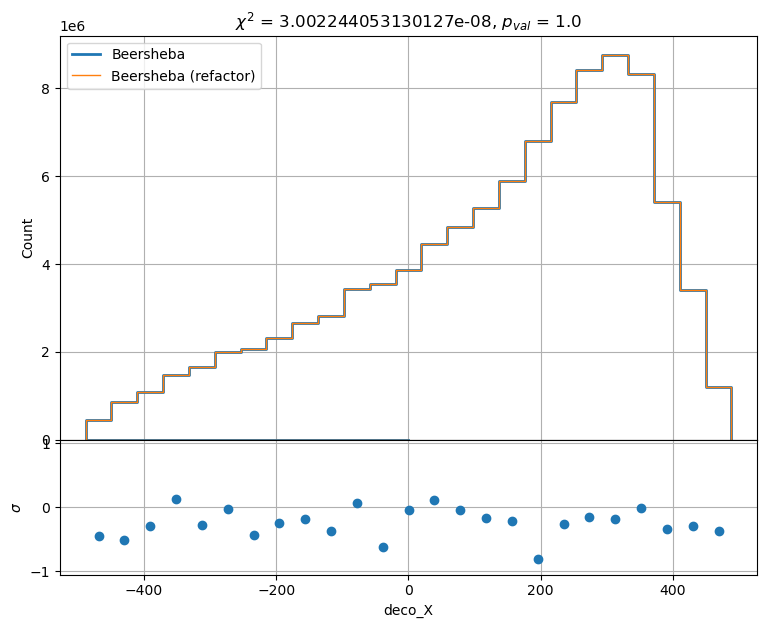

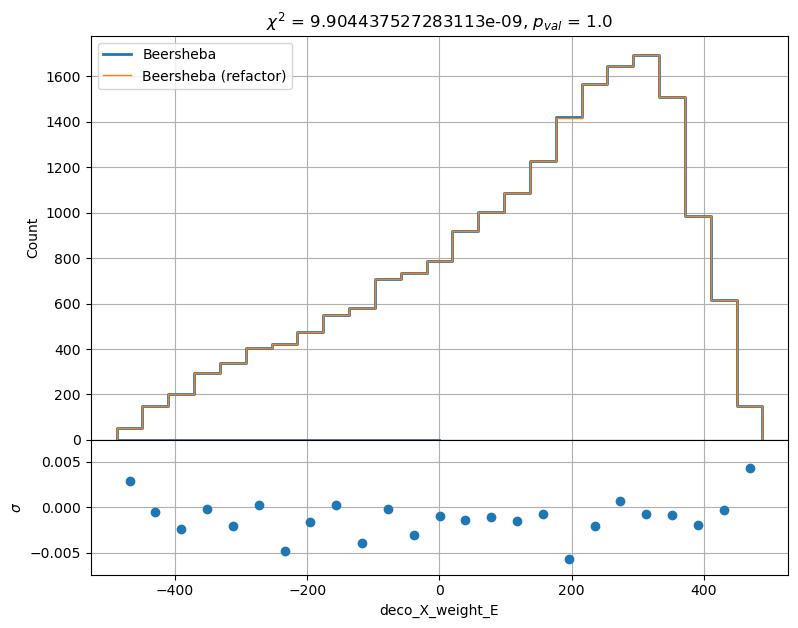

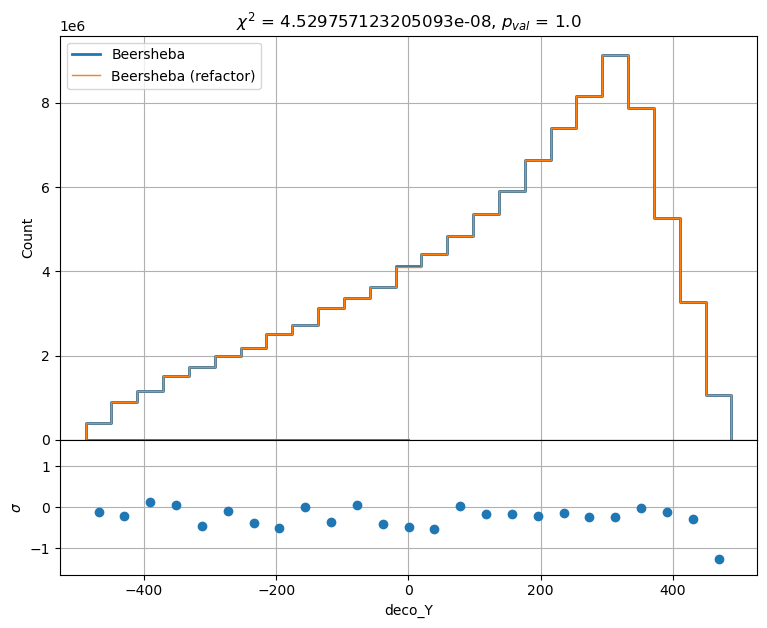

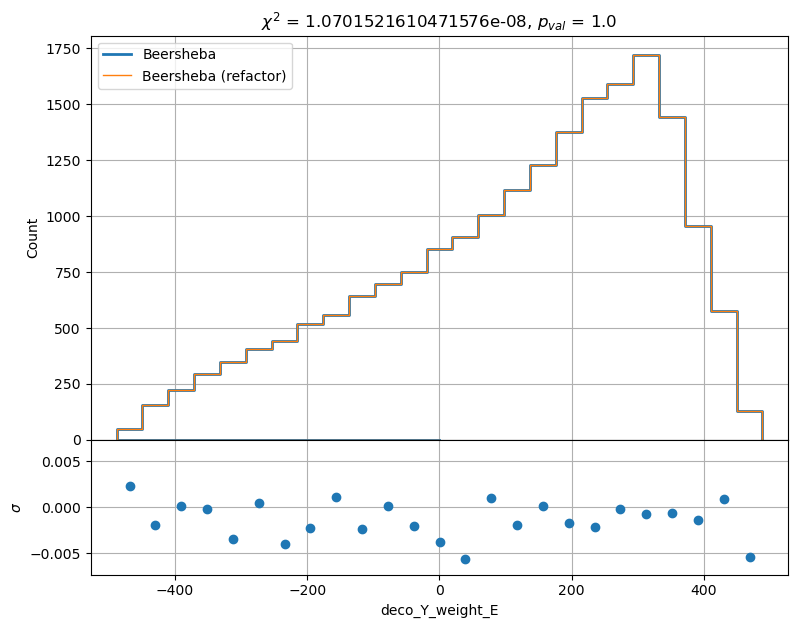

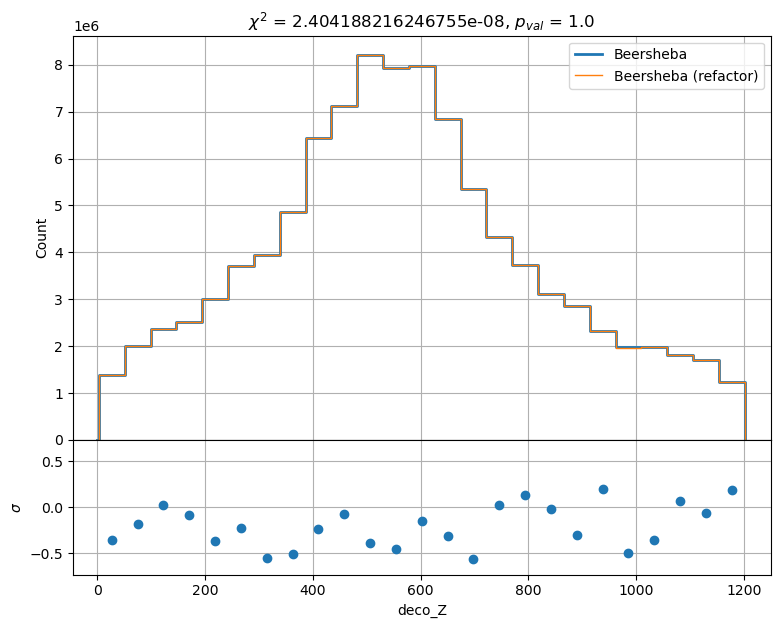

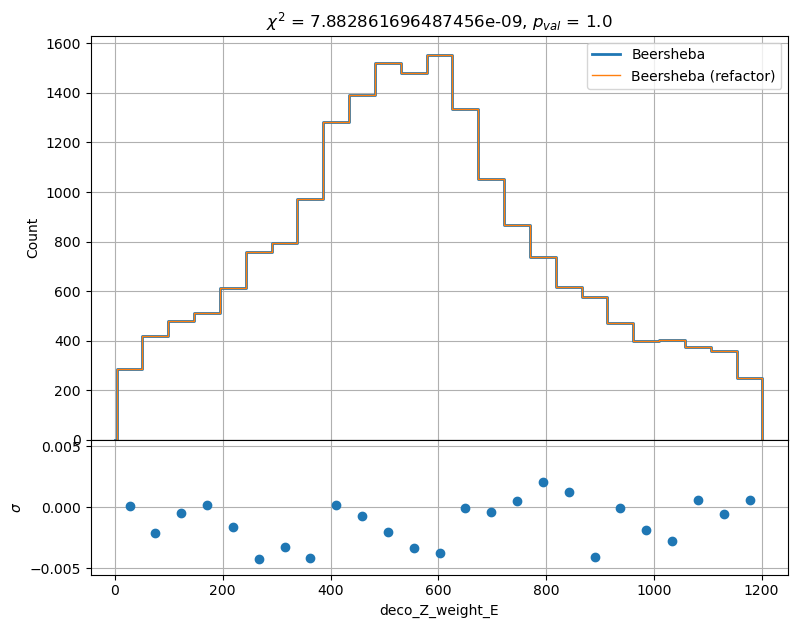

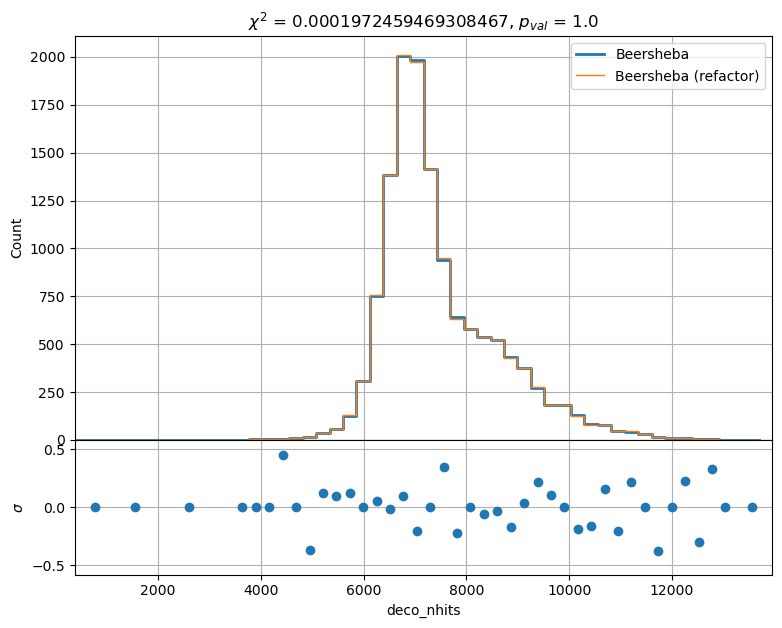

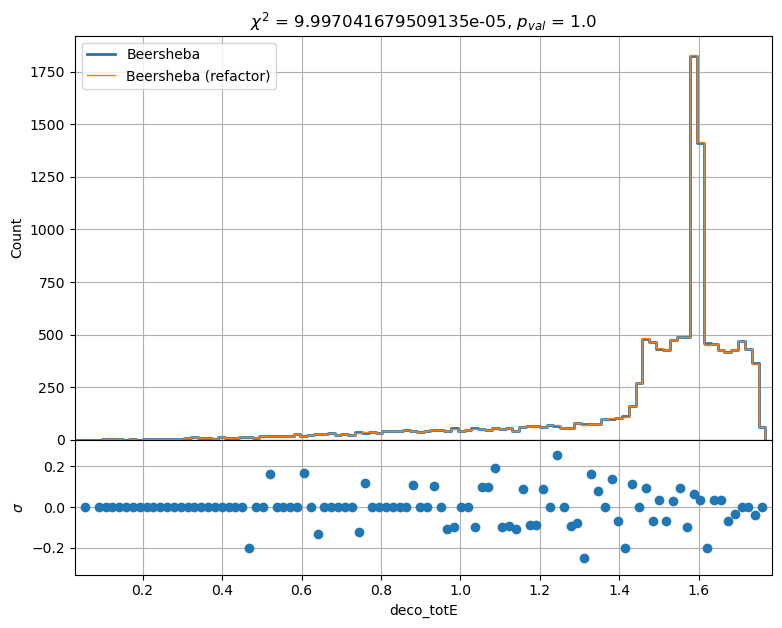

In [58]:
group_names, node_names = get_group_nodes_names(bee_old_100_path)
for n in node_names[0]:
    if n.split('_')[-1] == 'cut':
        continue
    if n[0:3] == 'low':
        continue
    #plot_hist_comparison(bee_old_10_path, bee_ref_10_path, 'beersheba', 'beersheba', n)
    plot_hist_comparison(bee_comp_100_path, bee_comp_100_path, 'beershebaold', 'beershebaref', n, legend1 = 'Beersheba', legend2='Beersheba (refactor)')
    #plt.savefig('show_plots/beersheba/bee_comp_' + n + '.png')
    plt.show()

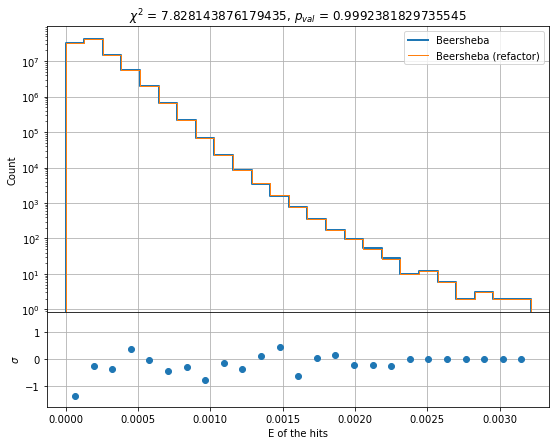

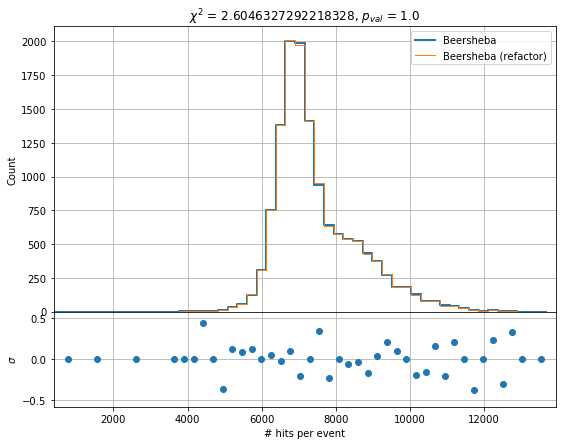

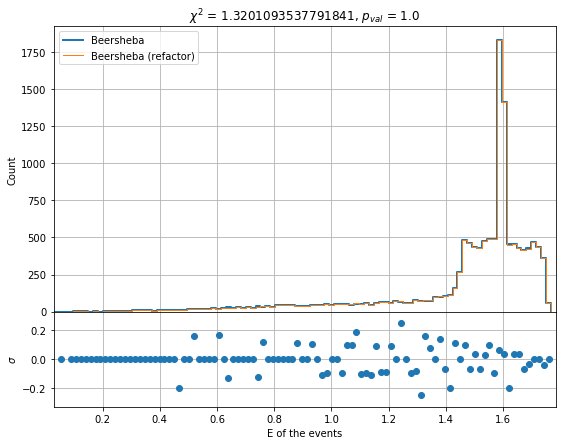

In [32]:
plot_hist_comparison(bee_comp_100_path, bee_comp_100_path, 'beershebaold', 'beershebaref', 'deco_E', scale = 'log', legend1 = 'Beersheba', legend2='Beersheba (refactor)', title = 'E of the hits')
plot_hist_comparison(bee_comp_100_path, bee_comp_100_path, 'beershebaold', 'beershebaref', 'deco_nhits', legend1 = 'Beersheba', legend2='Beersheba (refactor)', title = '# hits per event')
plot_hist_comparison(bee_comp_100_path, bee_comp_100_path, 'beershebaold', 'beershebaref', 'deco_totE', legend1 = 'Beersheba', legend2='Beersheba (refactor)', title = 'E of the events')



0.007991834331449262
0.008016905780515213


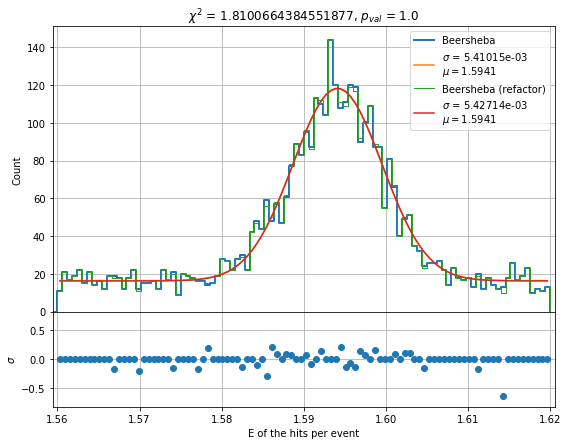

In [33]:
bee_old_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/old_prod/beersheba/*', 'beersheba')
bee_ref_path = get_all_files('/Users/mperez/NEXT/ic_dev/files/refactor_prod/beersheba/*', 'beersheba')

bee_old_hits = get_files_contents(bee_old_path, 'DECO', 'Events')
bee_ref_hits = get_files_contents(bee_ref_path, 'DECO', 'Events')

xrange_deco = (1.56, 1.62)

bee_old_hist = create_hist_df_simple(bee_old_hits.groupby('event').E.sum(), 100, xrange = xrange_deco)
bee_ref_hist = create_hist_df_simple(bee_ref_hits.groupby('event').E.sum(), 100, xrange = xrange_deco)

plot_hist_comparison(bee_old_hist, bee_ref_hist, 'beershebaold', 'beershebaref', n, legend1 = 'Beersheba', legend2='Beersheba (refactor)', title = 'E of the hits per event', fit = True)


## Comparación isaura

In [47]:
isa_old_100_path = '/Users/mperez/NEXT/ic_dev/files/old_prod/hist_isa_n100.h5'
isa_ref_100_path = '/Users/mperez/NEXT/ic_dev/files/refactor_prod/hist_isa_n100.h5'
isa_comp_100_path = '/Users/mperez/NEXT/ic_dev/files/isa_comp_n100.h5'

In [48]:
results = get_chi2_stats(isa_old_100_path, isa_ref_100_path, 'isaura')
results_ = get_chi2_stats(isa_comp_100_path, isa_comp_100_path, 'isaura', tag = ('old', 'ref'))


maintracks_E


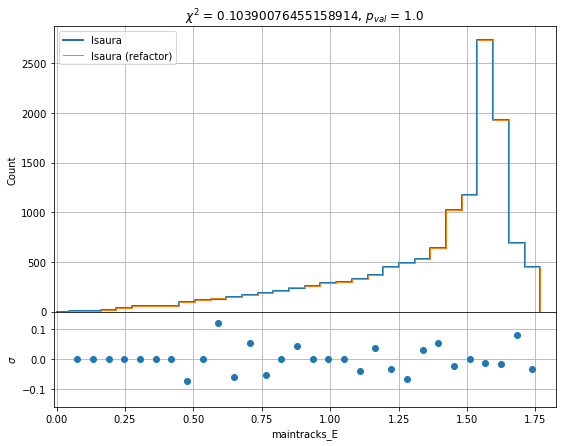

maintracks_L


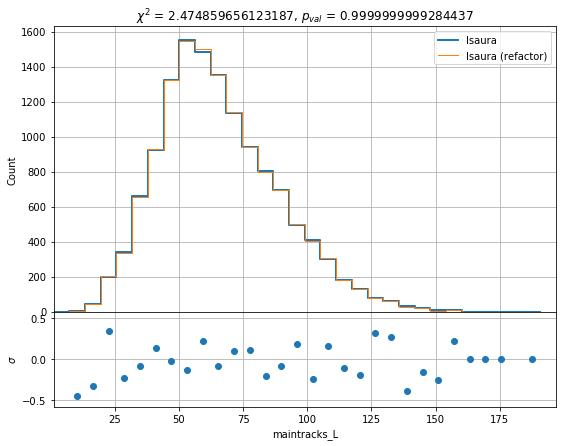

maintracks_R


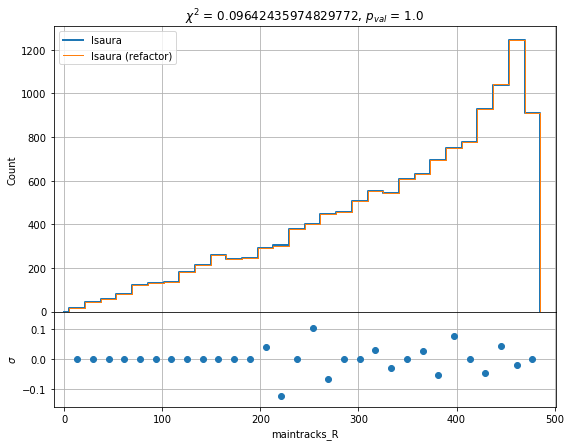

maintracks_Rmax


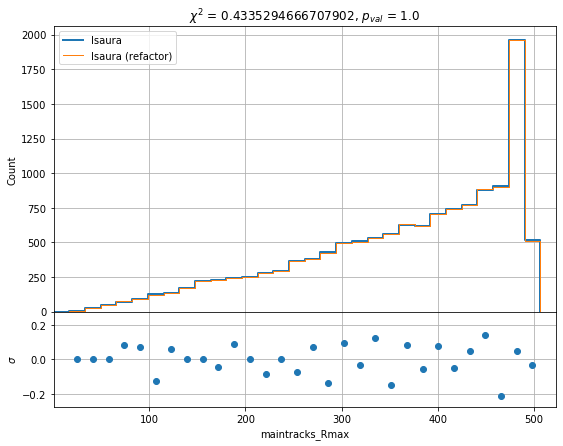

maintracks_X


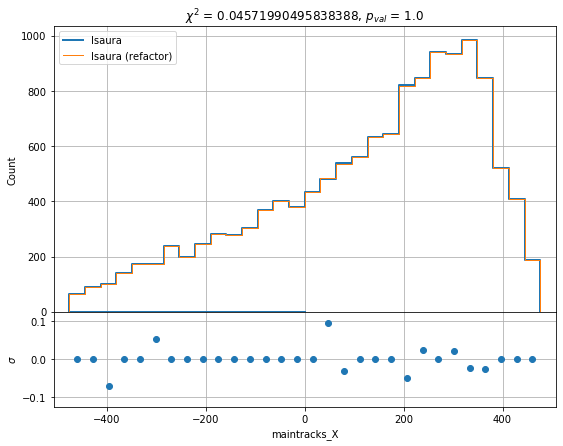

maintracks_Y


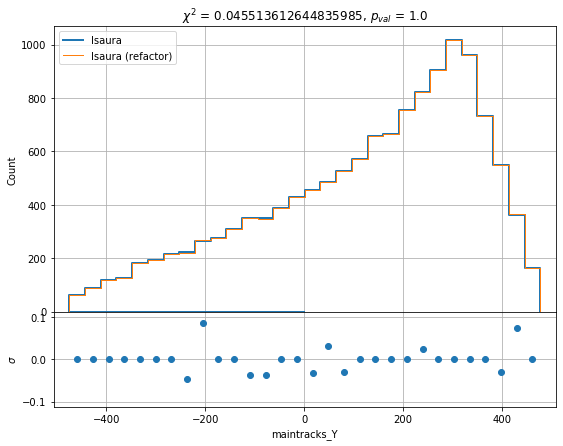

maintracks_Z


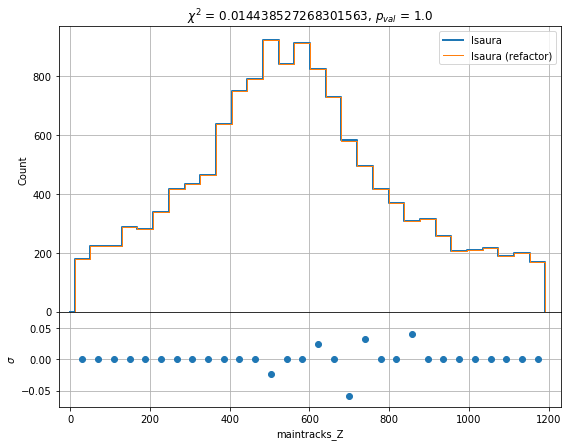

maintracks_eblob1


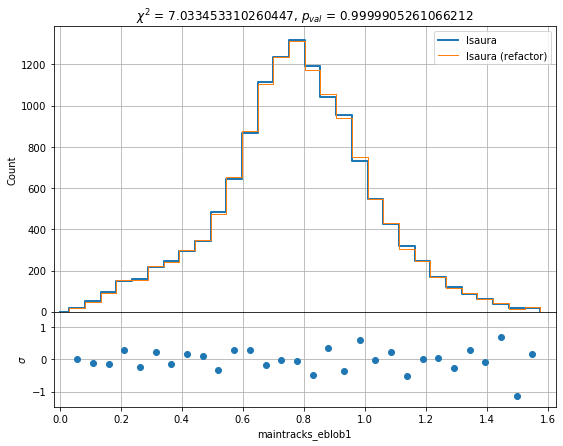

maintracks_eblob2


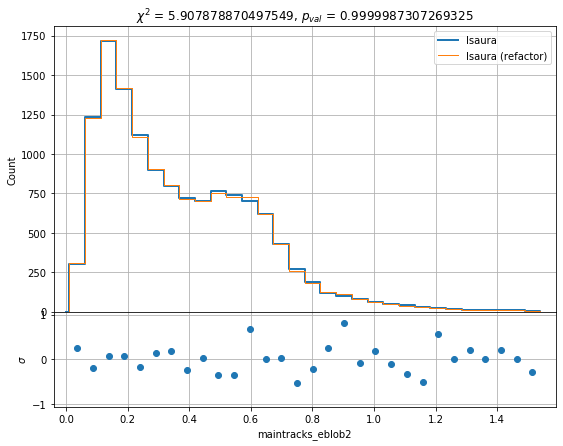

maintracks_nhits


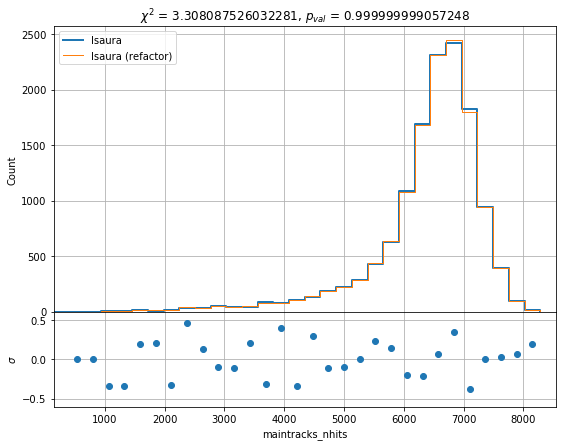

maintracks_nvox


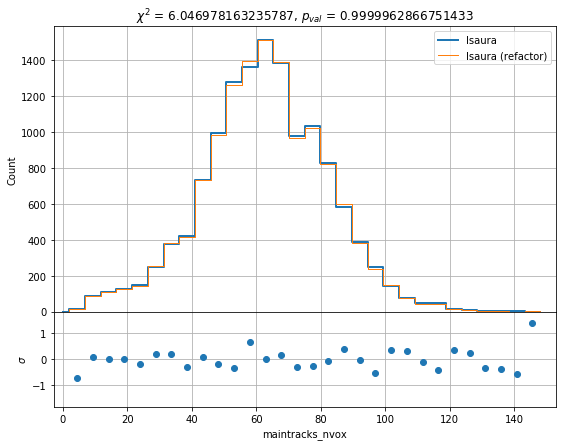

maintracks_ovlp


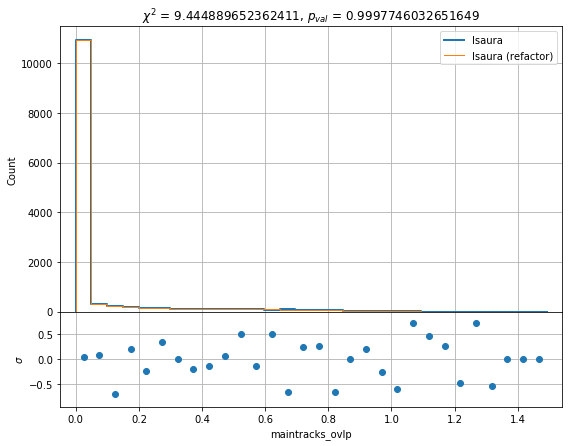

ntracks


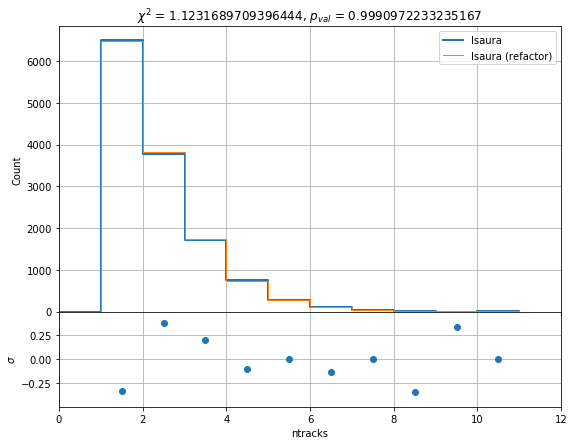

tracks_E


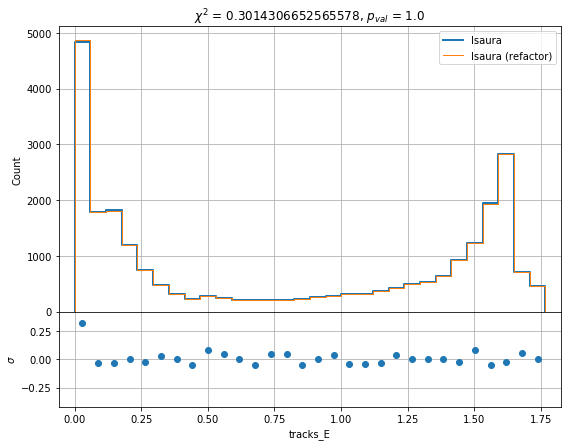

tracks_L


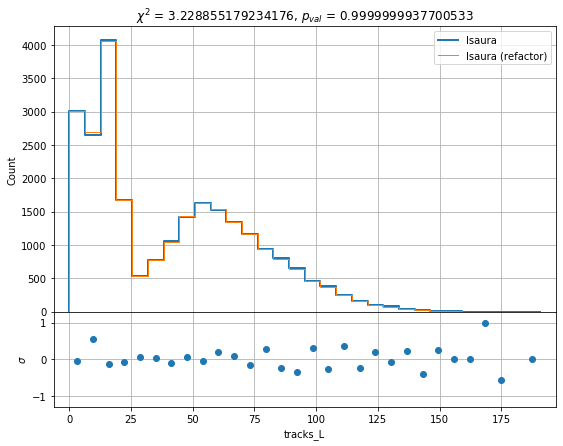

tracks_R


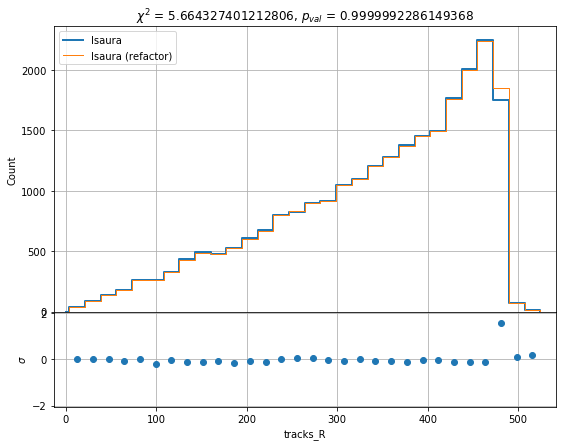

tracks_Rmax


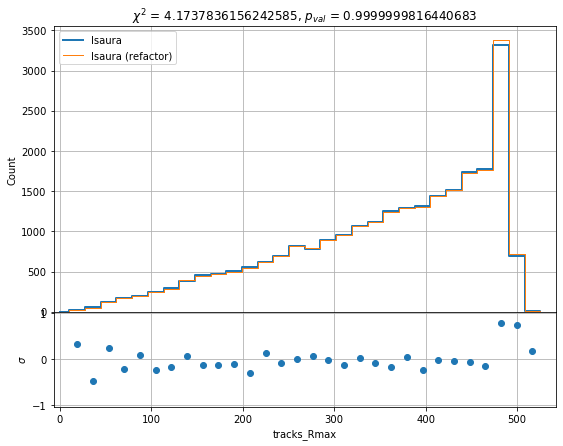

tracks_X


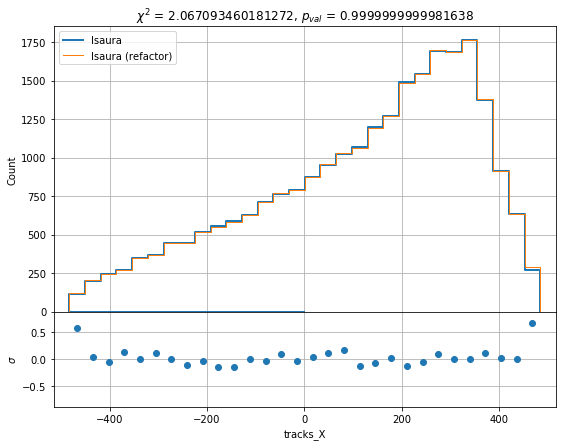

tracks_Y


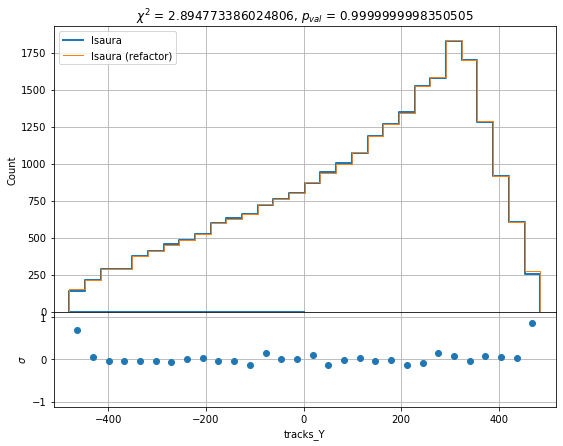

tracks_Z


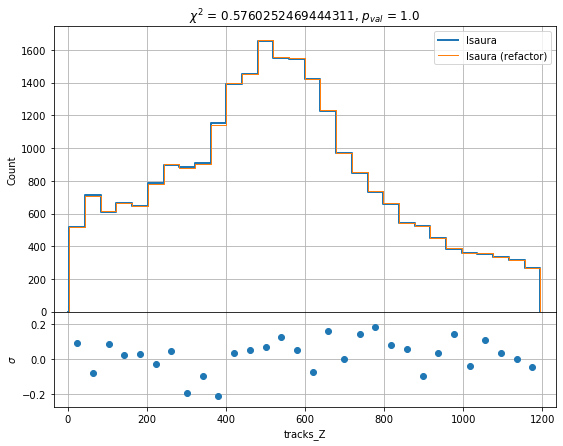

tracks_eblob1


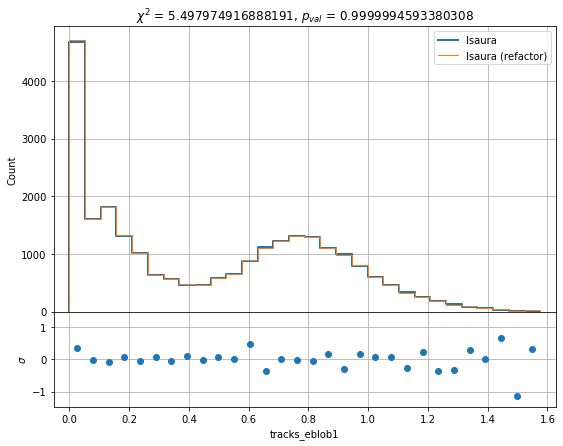

tracks_eblob2


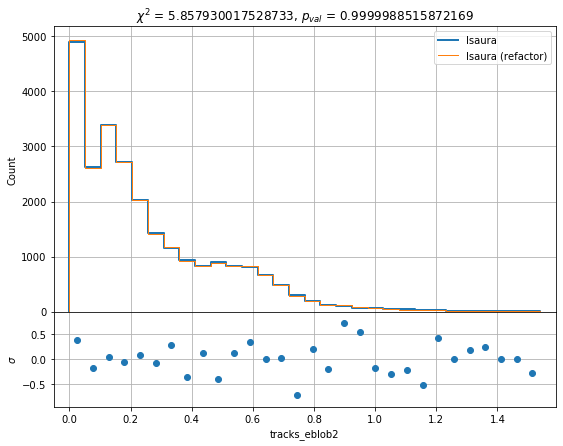

tracks_nhits


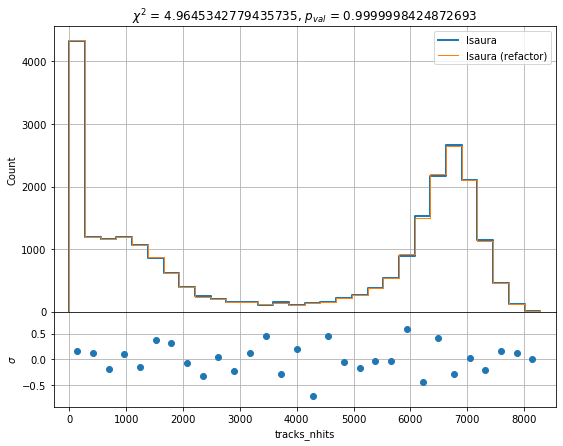

tracks_nvox


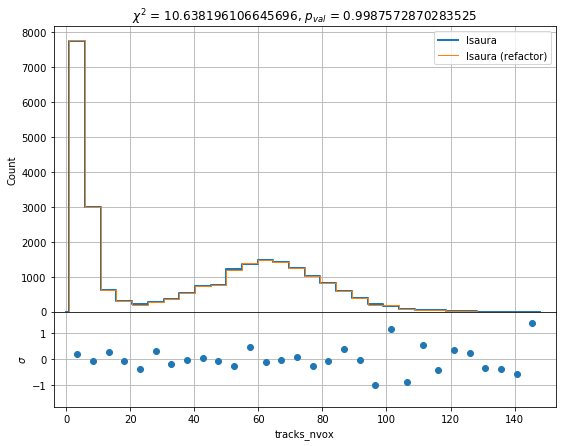

tracks_ovlp


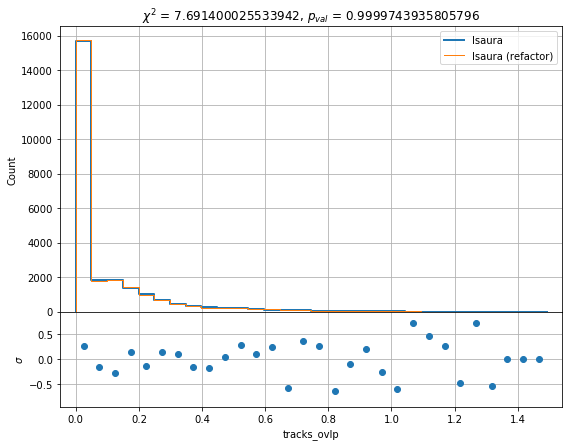

In [52]:
group_names, node_names = get_group_nodes_names(isa_old_100_path)
for n in node_names[0]:
    if n.split('_')[-1] == 'cut':
        continue
    if n[0:3] == 'low':
        continue
    print(n)
    plot_hist_comparison(isa_comp_100_path, isa_comp_100_path, 'isauraold', 'isauraref', n, legend1 = 'Isaura', legend2='Isaura (refactor)')
    #plt.savefig('show_plots/isaura/isa_comp_' + n + '.png')
    plt.show()

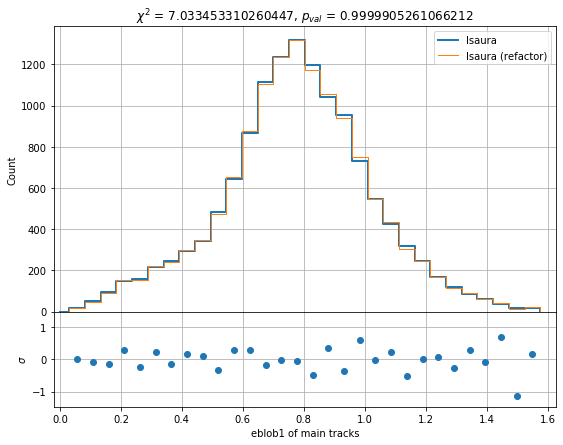

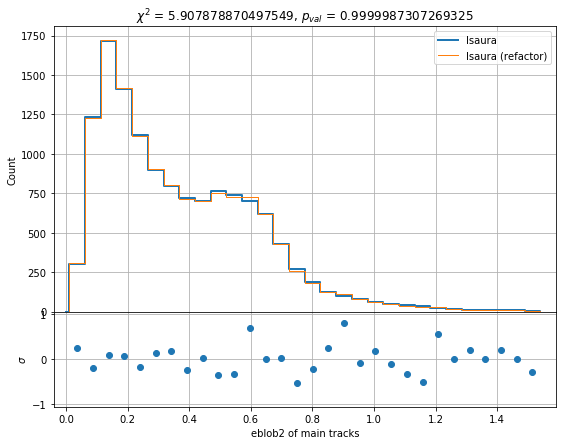

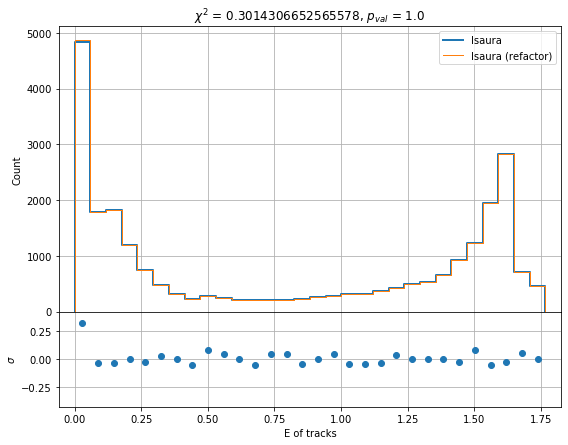

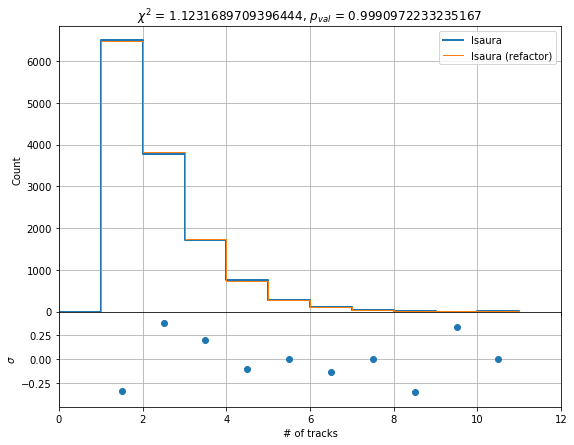

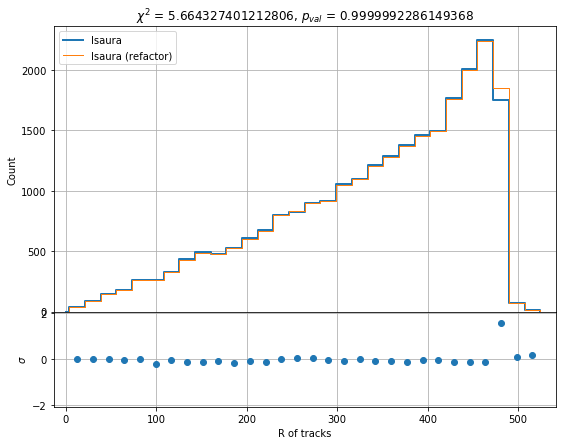

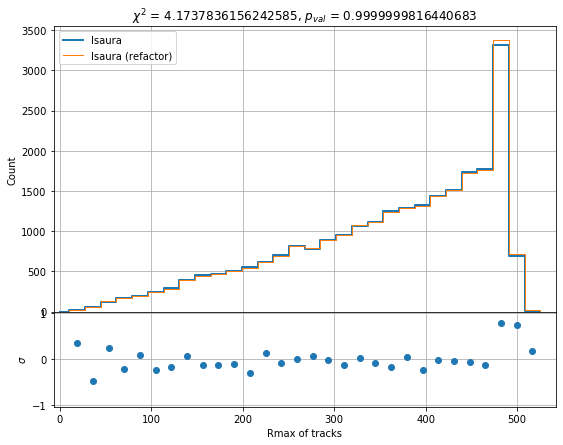

In [53]:
plot_hist_comparison(isa_comp_100_path, isa_comp_100_path, 'isauraold', 'isauraref', 'maintracks_eblob1', legend1 = 'Isaura', legend2='Isaura (refactor)', title = 'eblob1 of main tracks')
plot_hist_comparison(isa_comp_100_path, isa_comp_100_path, 'isauraold', 'isauraref', 'maintracks_eblob2', legend1 = 'Isaura', legend2='Isaura (refactor)', title = 'eblob2 of main tracks')
plot_hist_comparison(isa_comp_100_path, isa_comp_100_path, 'isauraold', 'isauraref', 'tracks_E', legend1 = 'Isaura', legend2='Isaura (refactor)', title = 'E of tracks')
plot_hist_comparison(isa_comp_100_path, isa_comp_100_path, 'isauraold', 'isauraref', 'ntracks', legend1 = 'Isaura', legend2='Isaura (refactor)', title = '# of tracks')
plot_hist_comparison(isa_comp_100_path, isa_comp_100_path, 'isauraold', 'isauraref', 'tracks_R', legend1 = 'Isaura', legend2='Isaura (refactor)', title = 'R of tracks')
plot_hist_comparison(isa_comp_100_path, isa_comp_100_path, 'isauraold', 'isauraref', 'tracks_Rmax', legend1 = 'Isaura', legend2='Isaura (refactor)', title = 'Rmax of tracks')


In [85]:
import matplotlib as mpl

from   mpl_toolkits.mplot3d import Axes3D
from   matplotlib.patches   import Patch

In [130]:
def plot_3d_hits_double(hits, mc_hits, value='energy', coords = ['x', 'y', 'z'], cmap = mpl.cm.jet, opacity = 1):
    '''
    Function to plot hits
    Args:
        hits: DataFrame or list/tuple/array of lists/tuples/arrays
    Contains the spatial information of the hits and their content. If we don't use a DataFrame, the input
    must have the structure (x, y, z, content), where content is usually the energy or the segclass. Its shape
    will be (4, N).
        value: STR
    Name of the content column in the DataFrame. Will be also the label of the colorbar.
        coords: LIST
    Name of the coords column in the DataFrame.
        cmap: matplotlib.cm
    Used colormap.
        opacity = FLOAT
    Value from 0 to 1 that indicates the opacity of the hits.
    '''

    if type(hits) == type(pd.DataFrame()):
        pass
    else:
        coor = np.array(hits).T
        hits = pd.DataFrame(coor, columns = coords + [value])

    xcoord  = hits[coords[0]].values
    ycoord  = hits[coords[1]].values
    zcoord  = hits[coords[2]].values
    content = hits[value].values

    fig  = plt.figure(figsize=(8, 8), frameon=False)
    gs   = fig.add_gridspec(12, 12)
    ax   = fig.add_subplot(gs[0:12, 0:10], projection = '3d')
    axcb = fig.add_subplot(gs[1:11, 11])
    norm = mpl.colors.Normalize(vmin=min(content), vmax=max(content))

    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(content))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(xcoord, ycoord, zcoord, c=colors * opacity, marker='o')
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')
    
    ax.scatter(mc_hits.x, mc_hits.y, mc_hits.z)


    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    cb.set_label (value, size = 15)
    cb.ax.tick_params(labelsize=13)
    cb.formatter.set_powerlimits((0, 0))
    #plt.show()

In [101]:
print(tb.open_file(old_esm_path))

/Users/mperez/NEXT/ic_dev/files/old_prod/esmeralda/esmeralda_1_228Th.h5 (File) ''
Last modif.: 'Wed Dec 14 22:05:22 2022'
Object Tree: 
/ (RootGroup) ''
/CHITS (Group) ''
/CHITS/highTh (Table(96808,), shuffle, zlib(4)) 'Hits'
/CHITS/lowTh (Table(96808,), shuffle, zlib(4)) 'Hits'
/DST (Group) ''
/DST/Events (Table(188,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/high_th_select (Table(125,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/low_th_select (Table(125,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/topology_select (Table(125,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/configuration (Table(30,), shuffle, zlib(4)) ''
/MC/event_mapping (Table(125,), shuffle, zlib(4)) ''
/MC/hits (Table(33490,), shuffle, zlib(4)) ''
/MC/particles (Table(10973,), shuffle, zlib(4)) ''
/MC/sns_positions (Table(0,), shuffle, zlib(4)) ''
/MC/sns_response (Table(0,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/eventMap (Table(125,), shu

In [276]:
mc_hits  = dio.load_dst(old_esm_path, 'MC', 'hits')
map_evs = dio.load_dst(old_esm_path, 'Run', 'eventMap')
low_hits = dio.load_dst(old_esm_path, 'CHITS', 'lowTh')

evt = 0
prod_evt = map_evs[map_evs.nexus_evt == evt].evt_number.values[0]

mc_hits_ev  = mc_hits[mc_hits.event_id == evt]
esm_hits_ev = low_hits[low_hits.event == prod_evt]




### Maybe clean the Nans to do the thing??
## Also this is done in beersheba for sure

### Maybe i have to do the slicing for the mc data also (as for preparing for a hipothetical NN to train)


### Also, maybe for MC we should do it differently and not summing for X and Y grouping but some kind of barycenter in the slice??? Maybe a combination, first this grouping then a weighted mean to get just one point (I think it is kind of the same to weighting all but in Z is forced to be in a certain place)

In [307]:
def slice_hits(df, slice_size, zslices = np.array([]), data_type = 'esmeralda'):
    if data_type == 'esmeralda':
        Z = 'Z'
        group_vals = ['event', 'X', 'Y']
        sum_vals  = ['Q', 'E', 'Ec']
    if data_type == 'mc':
        Z = 'z'
        group_vals = ['event_id', 'x', 'y']
        sum_vals  = ['energy']
        
    if len(zslices) == 0:
        minZ, maxZ = df[Z].min(), df[Z].max()
        zslices = np.append(np.arange(minZ, maxZ, slice_size), maxZ)
    
    sliced_event = pd.DataFrame()
    #df = df[~df.Ec.isnull()] #i clean to avoid 0 when summing (maybe it does nothing?)
    for i in range(len(zslices) - 1):
        slice_z = df[(zslices[i] <= df[Z]) & (df[Z] <= zslices[i + 1])]
        cent_slice = (zslices[i] + zslices[i + 1]) / 2
        new_coord = pd.DataFrame(slice_z.groupby(group_vals)[sum_vals].sum().reset_index())
        new_coord[Z] = cent_slice
        sliced_event = sliced_event.append(new_coord)
    #returns zslices so one sliced event can influence another
    return sliced_event, zslices

In [309]:
sliced_event, zslices = slice_hits(esm_hits_ev, 10)

In [310]:
mc_slice, mc_zslices = slice_hits(mc_hits_ev, 10, zslices=zslices, data_type='mc')

Process to reduce to a point the MC z slice:

In [331]:
ener = mc_slice.groupby('z').apply(lambda df: sum(df.energy)).reset_index().rename(columns = {0:'energy'})

In [332]:
x = mc_slice.groupby('z').apply(lambda df: sum(df.x * df.energy) / sum(df.energy)).reset_index().rename(columns = {0:'x'})

In [333]:
y = mc_slice.groupby('z').apply(lambda df: sum(df.y * df.energy) / sum(df.energy)).reset_index().rename(columns = {0:'y'})

In [336]:
new_mc_slice = x.merge(y, on = 'z').merge(ener, on = 'z')

<IPython.core.display.Javascript object>


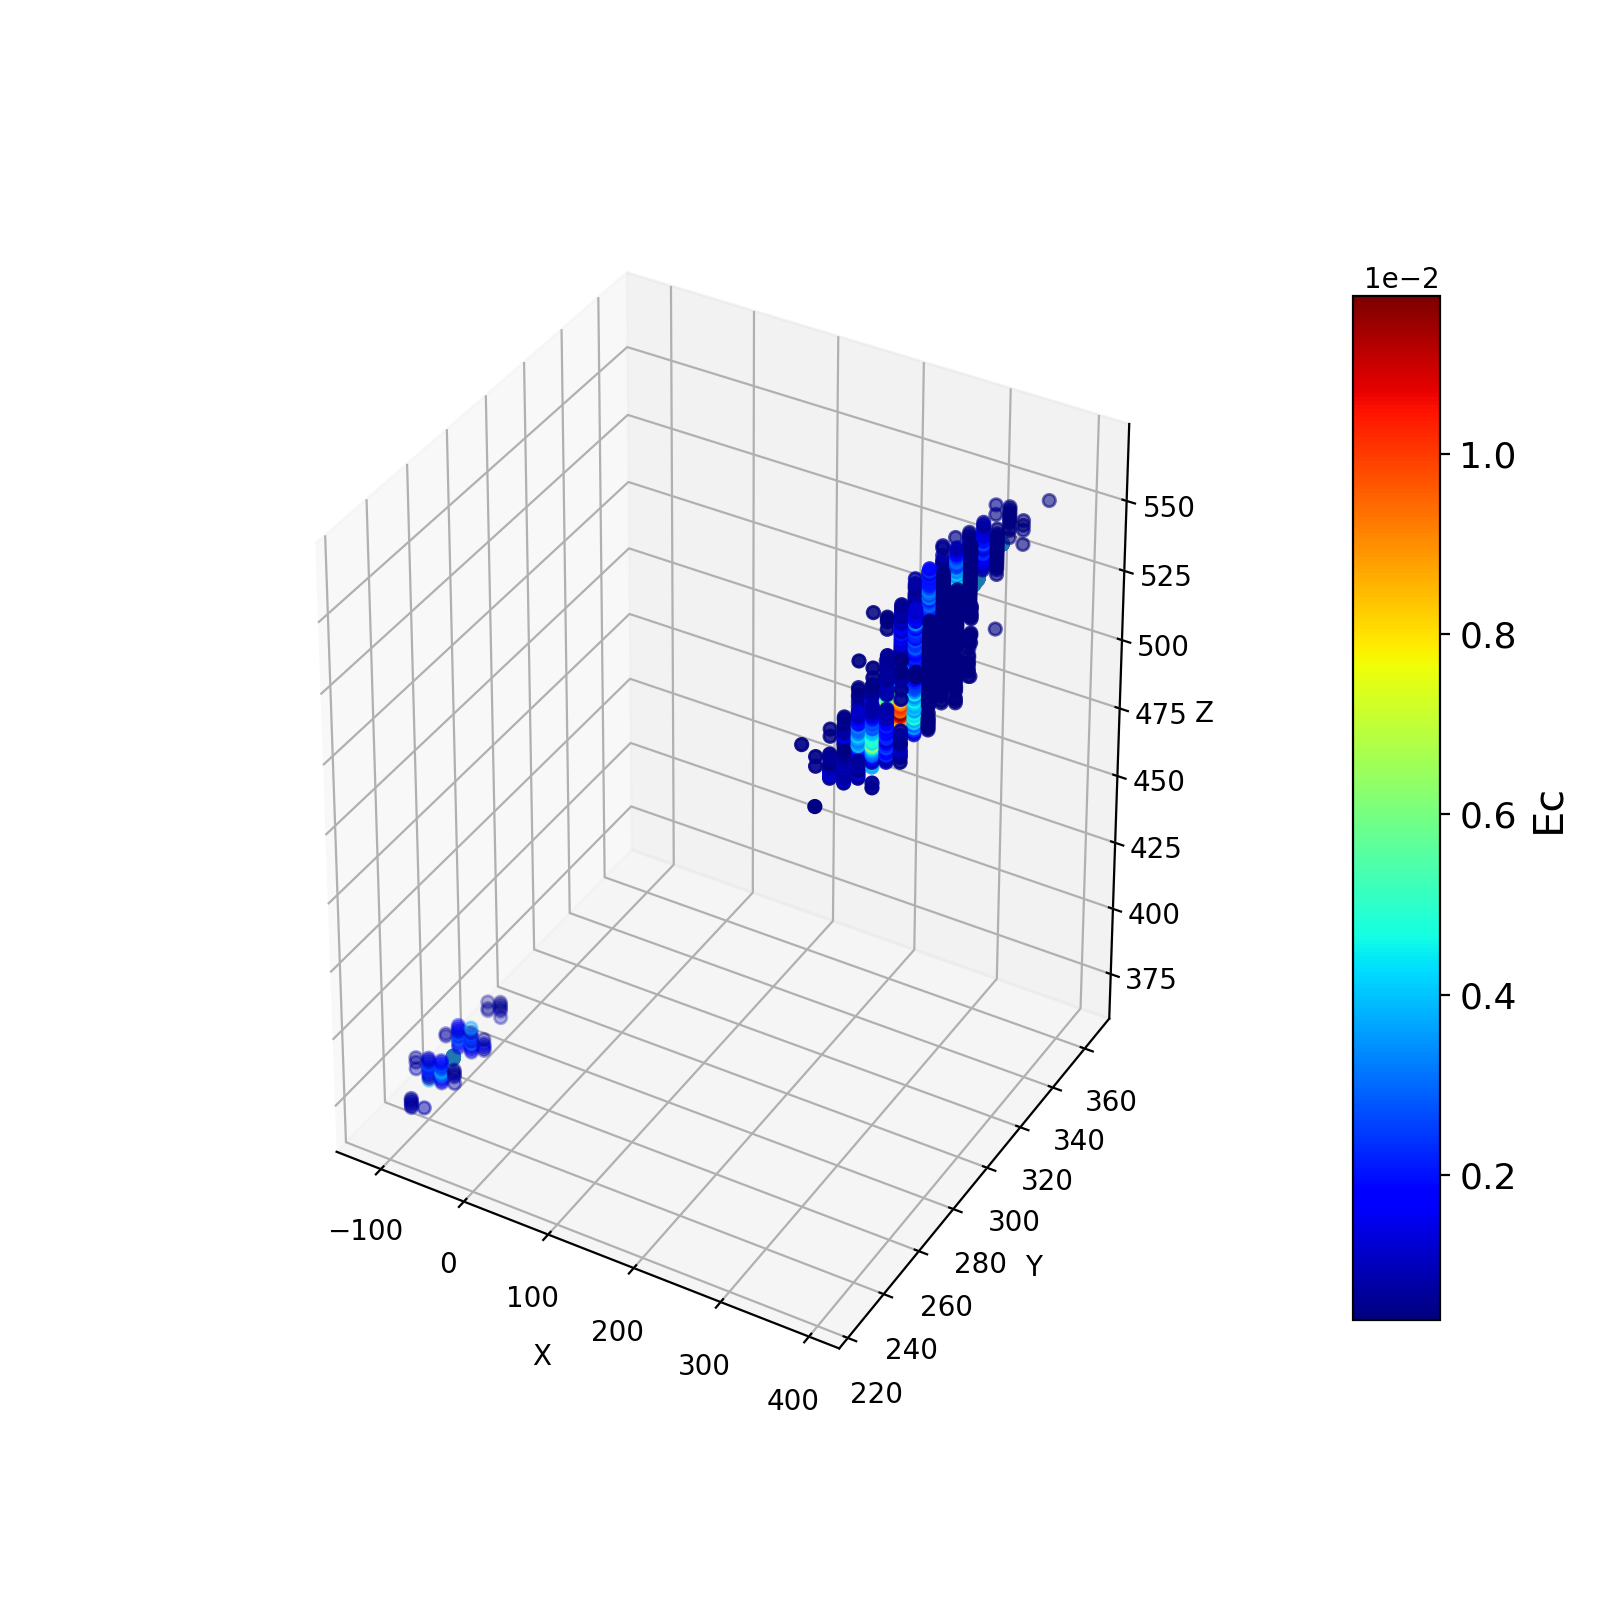

<IPython.core.display.Javascript object>


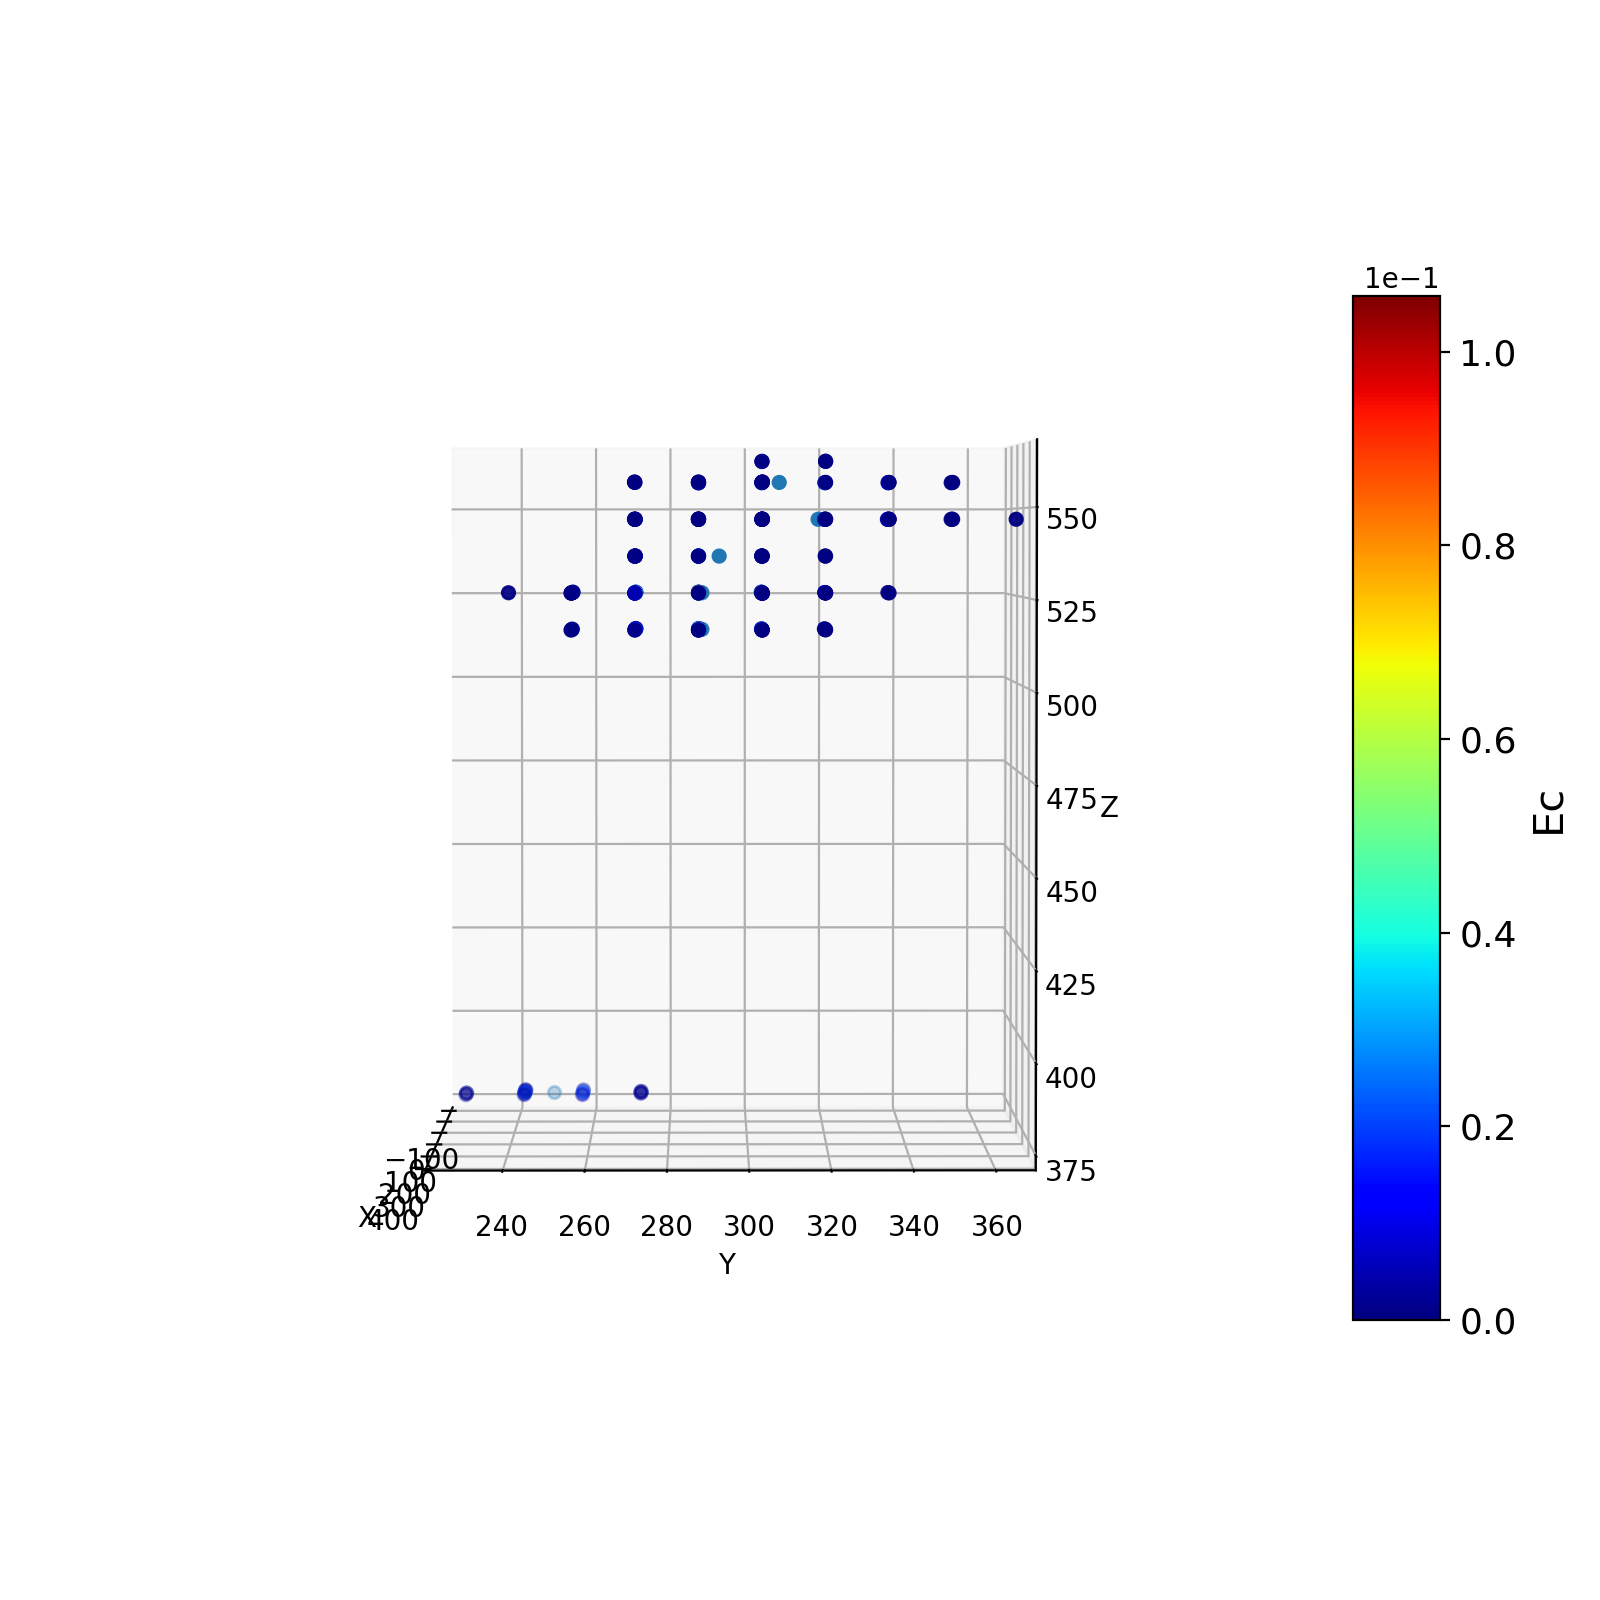

In [337]:
%matplotlib notebook
plot_3d_hits_double(esm_hits_ev, mc_hits_ev, value='Ec', coords=['X', 'Y', 'Z'])
plot_3d_hits_double(sliced_event, new_mc_slice, value='Ec', coords=['X', 'Y', 'Z'])
#plot_3d_hits(mc_hits_ev)